# Data

## Risk Free rate

Risk free rate is from RESSET database. 
Specifically,
1. 本表提供用于研究的日无风险收益数据。
2. 数据选择标准： 开始--2002年8月6日用三个月期定期银行存款利率； 2002年8月7日--2006年10月7日用三个月期中央银行票据的票面利率； 2006年10月8日--当前,用上海银行间3个月同业拆放利率。
3. 本表已将年度化的基准利率转化为以日为单位计量的收益数据，研究时可直接引用。

In [1]:
dir()

['AccountConfig',
 'AlphaHorizon',
 'AssetType',
 'BacktestDetailObject',
 'BondUniverse',
 'Commission',
 'DataAPI',
 'DynamicUniverse',
 'FUNDDY',
 'FUNDDYV2',
 'Factor',
 'FundFactor',
 'FundUniverse',
 'IdxCN',
 'In',
 'IndSW',
 'IndZJH',
 'IndZZ',
 'Monthly',
 'Optimizer',
 'OptionsUniverse',
 'OrderObject',
 'OrderState',
 'OrderStatus',
 'Out',
 'PortfolioObject',
 'PositionObject',
 'SecurityObject',
 'Signal',
 'SignalGenerator',
 'Slippage',
 'StockFactor',
 'StockScreener',
 'StockUniverse',
 'Weekly',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'auth_url',
 'backtest',
 'bt_detail_define_code',
 'bt_detail_format_code',
 'cal_covariance',
 'cal_factor_return',
 'cal_srisk',
 'cancel_order',
 'contest',
 'create_factor_tear_sheet',
 'datayes_risk_model',
 'datetime',
 'e',
 'evaluate_model',
 'exit',
 'f',
 'format_multi_asset_bt',
 'gen_dra

In [2]:
! python --version

Python 3.7.5


量化平台的版本较旧，可能会有代码的变化

In [3]:
# Data is uploaded into uqer, but where is it?
! ls

1-EDA.ipynb			 experiments
2-sort_FMreg_on_beta_size.ipynb  fillna_example.ipynb
3-FF3.ipynb			 index_df_21_22.pkl
4-momentum_reversal.ipynb	 IPO
5-daily_factors.ipynb		 myutils
5-liquidity_volatility.ipynb	 output_data
6-backtest.ipynb		 __pycache__
6-factor_application.ipynb	 quant.png
7-crs_and_timing.ipynb		 reversal.ipynb
7-ta_test.ipynb			 stk_df2.pkl
8-ta_ML.ipynb			 strategy_example_202403.ipynb
baidu				 Untitled1.ipynb
data				 Untitled2.ipynb
exam				 Untitled3.ipynb
exercises			 Untitled.ipynb


In [4]:
! ls ..

datas  nbconvert	notebook_secret  notes_py3
lib    nbsignatures.db	notes		 runtime


In [5]:
# # 👇 There it is!
# ! ls ../datas

In [6]:
# pd.read_csv('../datas/rf-daily.csv')

In [7]:
rf_df = pd.read_csv('./data/rf-daily-2025.csv')

In [8]:
rf_df.head()

日期_Date  日无风险收益率_DRFRet
0  2000-01-01        0.000054
1  2000-01-02        0.000054
2  2000-01-03        0.000054
3  2000-01-04        0.000054
4  2000-01-05        0.000054

In [9]:
rf_df.tail()

日期_Date  日无风险收益率_DRFRet
9163  2025-02-01        0.000068
9164  2025-02-02        0.000068
9165  2025-02-03        0.000068
9166  2025-02-04        0.000068
9167  2025-02-05        0.000068

In [10]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 2 columns):
日期_Date           9168 non-null object
日无风险收益率_DRFRet    9168 non-null float64
dtypes: float64(1), object(1)
memory usage: 143.3+ KB


In [11]:
# rf_df.drop('Unnamed: 2',axis=1,inplace=True)

In [12]:
rf_df.rename(columns={'日无风险收益率_DRFRet':'rf','日期_Date':'date'},inplace=True)

In [13]:
# 另一种改名方式
# rf_df.columns = ['rf','date']

In [14]:
rf_df['date'] = pd.to_datetime(rf_df['date'], format='%Y-%m-%d')

In [15]:
rf_df.head()

date        rf
0 2000-01-01  0.000054
1 2000-01-02  0.000054
2 2000-01-03  0.000054
3 2000-01-04  0.000054
4 2000-01-05  0.000054

In [16]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")

In [17]:
stk_info

secID  ticker               secShortName               cnSpell  \
0      000001.XSHE  000001                       平安银行                  PAYH   
1      000002.XSHE  000002                        万科A                   WKA   
2      000003.XSHE  000003                      PT金田A                 PTJTA   
3      000004.XSHE  000004                       国华网安                  GHWA   
4      000005.XSHE  000005                       ST星源                  STXY   
5      000006.XSHE  000006                       深振业A                  SZYA   
6      000007.XSHE  000007                        全新好                   QXH   
7      000008.XSHE  000008                       神州高铁                  SZGT   
8      000009.XSHE  000009                       中国宝安                  ZGBA   
9       00001.XHKG   00001                         长和                    CH   
10     000010.XSHE  000010                       美丽生态                  MLST   
11     000011.XSHE  000011                       深物业A                  SWYA   
12     000012.XSHE  000012                        南玻A                   NBA   
13     000013.XSHE  000013                     *ST石化A                   NaN   
14     000014.XSHE  000014                       沙河股份                  SHGF   
15     000015.XSHE  000015                      PT中浩A                 PTZHA   
16     000016.XSHE  000016                       深康佳A                  SKJA   
17     000017.XSHE  000017                       深中华A                  SZHA   
18     000018.XSHE  000018                       神城A退                  SCAT   
19     000019.XSHE  000019                       深粮控股                  SLKG   
20      00002.XHKG   00002                       中电控股                  ZDKG   
21     000020.XSHE  000020                       深华发A                  SHFA   
22     000021.XSHE  000021                        深科技                   SKJ   
23     000022.XSHE  000022                       深赤湾A                  SCWA   
24     000023.XSHE  000023                      *ST深天                 *STST   
25     000024.XSHE  000024                       招商地产                  ZSDC   
26     000025.XSHE  000025                        特力A                   TLA   
27     000026.XSHE  000026                        飞亚达                   FYD   
28     000027.XSHE  000027                       深圳能源                  SZNY   
29     000028.XSHE  000028                       国药一致                  GYYZ   
...            ...     ...                        ...                   ...   
38404    ZLAB.XNAS    ZLAB                       再鼎医药                  ZDYY   
38405      ZM.XNAS      ZM                ZoomVideo通讯           ZoomVideoTX   
38406     ZME.XNYS     ZME                       掌门教育                  ZMJY   
38407    ZNGA.XNAS    ZNGA            ZYNGA INC- CL A       ZYNGA INC- CL A   
38408     ZNH.XNYS     ZNH                       南方航空                  NFHK   
38409    ZNTE.XNAS    EVEX                   EVE HOLD              EVE HOLD   
38410   ZNTEU.XNAS   ZNTEU           ZANITE ACQUISITI      ZANITE ACQUISITI   
38411    ZNTL.XNAS    ZNTL              ZENTALIS PHAR         ZENTALIS PHAR   
38412     ZOM.AMXO     ZOM                   ZOMEDICA              ZOMEDICA   
38413    ZONE.AMXO    ZONE  CleanCore Solutions Inc-B  CleanCore Solutio...   
38414    ZOOM.XNAS    ZOOM                       zoom                   NaN   
38415      ZS.XNAS      ZS                    ZSCALER               ZSCALER   
38416    ZSAN.XNAS    ZSAN  Zosano Pharma Corporation  Zosano Pharma Cor...   
38417    ZSPC.XNAS    ZSPC                 zSpace Inc            zSpace Inc   
38418      ZT.XNAS      ZT              ZIMMER ENERGY         ZIMMER ENERGY   
38419   ZTAQU.XNAS   ZTAQU           ZIMMER ENERGY TR      ZIMMER ENERGY TR   
38420    ZTEK.XNAS    ZTEK                     ZENTEK                ZENTEK   
38421     ZTO.XNYS     ZTO                       中通快递                  ZTKD   
38422     ZTS.XNYS     ZTS                         硕腾          

In [18]:
stk_info['exchangeCD'].unique()

array(['XSHE', 'XHKG', 'NOBB', 'XKRX', 'XTAI', 'XKOS', 'XBEI', 'XTKS',
       'XSHG', 'XXSC', 'XASX', 'XSES', 'XNYS', 'XNAS', 'AMXO', 'TMXS',
       'XNSE', 'XIDX', 'OOTC', 'XJSE', 'XBOM', 'XKLS', 'XSWX', 'XBKK',
       'HOSE', 'XLON', 'XPHS', 'XMIC', 'XMIL', 'XPAR', 'EURO', 'XSAO'],
      dtype=object)

In [19]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")
stk_id = stk_info['secID']
index_info = DataAPI.SecIDGet(assetClass="IDX",pandas="1")

In [20]:
stk_info.head()

secID  ticker secShortName cnSpell exchangeCD assetClass  \
0  000001.XSHE  000001         平安银行    PAYH       XSHE          E   
1  000002.XSHE  000002          万科A     WKA       XSHE          E   
2  000003.XSHE  000003        PT金田A   PTJTA       XSHE          E   
3  000004.XSHE  000004         国华网安    GHWA       XSHE          E   
4  000005.XSHE  000005         ST星源    STXY       XSHE          E   

  listStatusCD    listDate transCurrCD          ISIN  partyID  delistDate  
0            L  1991-04-03         CNY  CNE000000040      2.0         NaN  
1            L  1991-01-29         CNY  CNE0000000T2      3.0         NaN  
2           DE  1991-07-03         CNY  CNE1000031Y5      4.0  2002-06-14  
3            L  1990-12-01         CNY  CNE0000000Y2      5.0         NaN  
4           DE  1990-12-10         CNY  CNE0000001L7      6.0  2024-04-26

In [21]:
index_info.head()

secID       ticker secShortName cnSpell exchangeCD assetClass  \
0  000001.ESCI.XZCE  000001.ESCI       易盛农期综指  YSNQZZ       XZCE        IDX   
1       000001.ZICN       000001         上证综指    SZZZ       XSHG        IDX   
2  000002.ESCI.XZCE  000002.ESCI       易盛农期谷物  YSNQGW       XZCE        IDX   
3       000002.ZICN       000002         上证A股    SZAG       XSHG        IDX   
4  000003.ESCI.XZCE  000003.ESCI       易盛农期软商  YSNQRS       XZCE        IDX   

  listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
0            L         NaN         CNY           NaN  27145.0        NaN  
1            L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
2            L  2018-10-22         CNY           NaN  27145.0        NaN  
3            L  1992-02-21         CNY  CNM000000027  17764.0        NaN  
4            L         NaN         CNY           NaN  27145.0        NaN

In [22]:
index_info['secID'].nunique()

24104

## Market Index return

In [23]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1      000001.ZICN  000001         上证综指    SZZZ       XSHG        IDX   
174    000300.ZICN  000300        沪深300   HS300       XSHG        IDX   
337    000852.ZICN  000852       中证1000  ZZ1000       XSHG        IDX   
360    000905.ZICN  000905        中证500   ZZ500       XSHG        IDX   
3913   399006.ZICN  399006         创业板指    CYBZ       XSHE        IDX   
3935   399106.ZICN  399106         深证综指    SZZZ       XSHE        IDX   
3988   399300.ZICN  399300        沪深300   HS300       XSHE        IDX   
4233   399852.XSHE  399852       中证1000  ZZ1000       XSHE        IDX   
4237   399905.ZICN  399905        中证500   ZZ500       XSHE        IDX   
19356     CNT.XSHE     CNT         创业板指    CYBZ       XSHE        IDX   
19369  CSI300.XHKG  CSI300        沪深300   HS300       XHKG        IDX   

      listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
1                L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
174              L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
337              L  2014-10-17         CNY           NaN  17768.0        NaN  
360              L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
3913             L  2010-06-01         CNY           NaN  17765.0        NaN  
3935             L  1991-04-04         CNY  CNM000000001  17765.0        NaN  
3988             L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
4233             L  2014-10-17         CNY           NaN  17768.0        NaN  
4237             L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
19356            L  2010-06-01         CNY           NaN  17765.0        NaN  
19369            L  2005-04-08         CNY           NaN  17768.0        NaN

In [24]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values

array(['000001.ZICN', '000300.ZICN', '000852.ZICN', '000905.ZICN',
       '399006.ZICN', '399106.ZICN'], dtype=object)

In [25]:
sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
start = '20000101'
end = '20251231'
index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")

In [26]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31146 entries, 0 to 31145
Data columns (total 7 columns):
indexID          31146 non-null object
secShortName     31146 non-null object
tradeDate        31146 non-null object
closeIndex       31146 non-null float64
turnoverVol      30426 non-null float64
turnoverValue    30426 non-null float64
CHGPct           31146 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [27]:
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')

In [28]:
index_df.head()

indexID secShortName  tradeDate  closeIndex   turnoverVol  \
0  000001.ZICN         上证综指 2000-01-04    1406.371  9.034023e+08   
1  000001.ZICN         上证综指 2000-01-05    1409.682  1.057998e+09   
2  000001.ZICN         上证综指 2000-01-06    1463.942  1.348052e+09   
3  000001.ZICN         上证综指 2000-01-07    1516.604  3.451570e+09   
4  000001.ZICN         上证综指 2000-01-10    1545.112  3.125354e+09   

   turnoverValue    CHGPct  
0   5.183898e+09  0.029117  
1   8.137326e+09  0.002354  
2   9.520842e+09  0.038491  
3   1.948719e+10  0.035973  
4   1.877911e+10  0.018797

In [29]:
index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')

In [30]:
index_ret_df.head()

secShortName      上证综指  中证1000  中证500  创业板指  沪深300      深证综指
tradeDate                                                   
2000-01-04    0.029117     NaN    NaN   NaN    NaN  0.031088
2000-01-05    0.002354     NaN    NaN   NaN    NaN  0.003075
2000-01-06    0.038491     NaN    NaN   NaN    NaN  0.041107
2000-01-07    0.035973     NaN    NaN   NaN    NaN  0.037170
2000-01-10    0.018797     NaN    NaN   NaN    NaN  0.021311

In [31]:
rf_df.set_index('date',inplace=True)

In [32]:
rf_df.head()

rf
date                
2000-01-01  0.000054
2000-01-02  0.000054
2000-01-03  0.000054
2000-01-04  0.000054
2000-01-05  0.000054

In [33]:
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)

In [34]:
index_ret_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指        rf
2000-01-04  0.029117     NaN    NaN   NaN    NaN  0.031088  0.000054
2000-01-05  0.002354     NaN    NaN   NaN    NaN  0.003075  0.000054
2000-01-06  0.038491     NaN    NaN   NaN    NaN  0.041107  0.000054
2000-01-07  0.035973     NaN    NaN   NaN    NaN  0.037170  0.000054
2000-01-10  0.018797     NaN    NaN   NaN    NaN  0.021311  0.000054

In [35]:
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0) # 计算超额收益率

In [36]:
index_retx_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指
2000-01-04  0.029063     NaN    NaN   NaN    NaN  0.031034
2000-01-05  0.002300     NaN    NaN   NaN    NaN  0.003021
2000-01-06  0.038437     NaN    NaN   NaN    NaN  0.041053
2000-01-07  0.035919     NaN    NaN   NaN    NaN  0.037116
2000-01-10  0.018743     NaN    NaN   NaN    NaN  0.021257

In [37]:
index_retx_df.tail()

上证综指    中证1000     中证500      创业板指     沪深300      深证综指
2025-01-22 -0.009011 -0.008918 -0.004837 -0.005444 -0.009356 -0.010005
2025-01-23  0.005079 -0.004629 -0.004135 -0.003743  0.001704 -0.003797
2025-01-24  0.006886  0.018648  0.011696  0.013559  0.007588  0.011995
2025-01-27 -0.000691 -0.015571 -0.010795 -0.027412 -0.004186 -0.013112
2025-02-05 -0.006563  0.005982  0.004413 -0.000503 -0.005830  0.004378

In [38]:
# sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
# start = '20000101'
# end = '20251231'
# index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")
# index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
# index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')
# index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
# index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

### Market Index Return Plot

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 9.0)

In [40]:
# Raw index plot
index_df.pivot(index='tradeDate',columns='secShortName',values='closeIndex').plot()

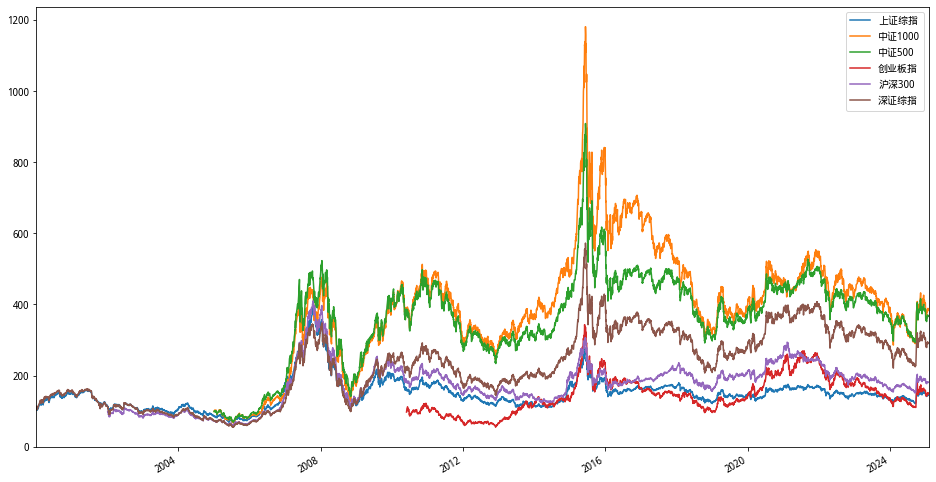

In [41]:
((1 + index_retx_df).cumprod()*100).plot()

早期的平稳可能是一种假象：数据到后面会越来越大。log return会看得更清楚

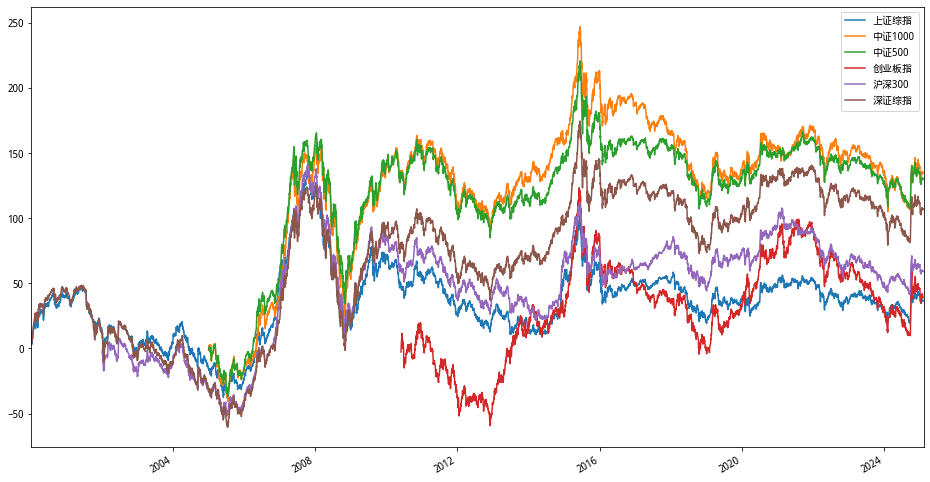

In [42]:
# log return
(np.log(1 + index_retx_df).cumsum()*100).plot()

In [43]:
((1 + index_retx_df.loc['2006':'2025']).cumprod()*100).plot()

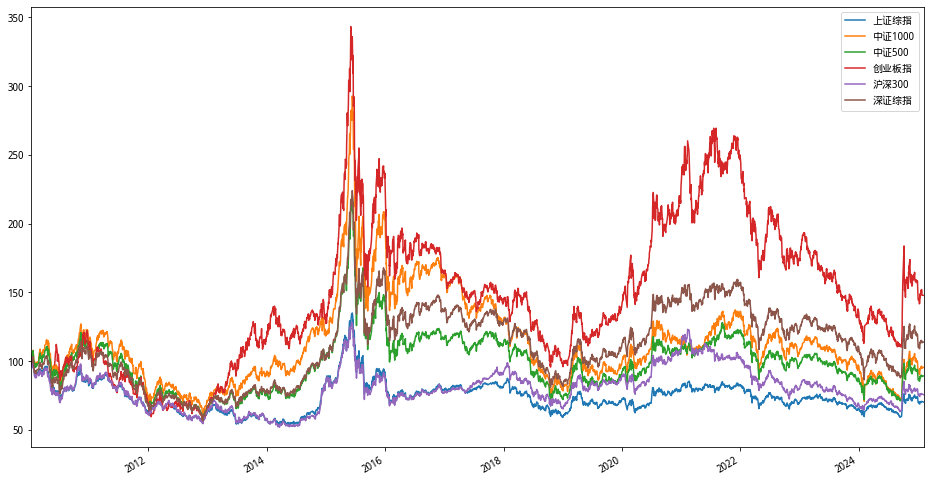

In [44]:
((1 + index_retx_df.loc['2010':'2025']).cumprod()*100).plot()

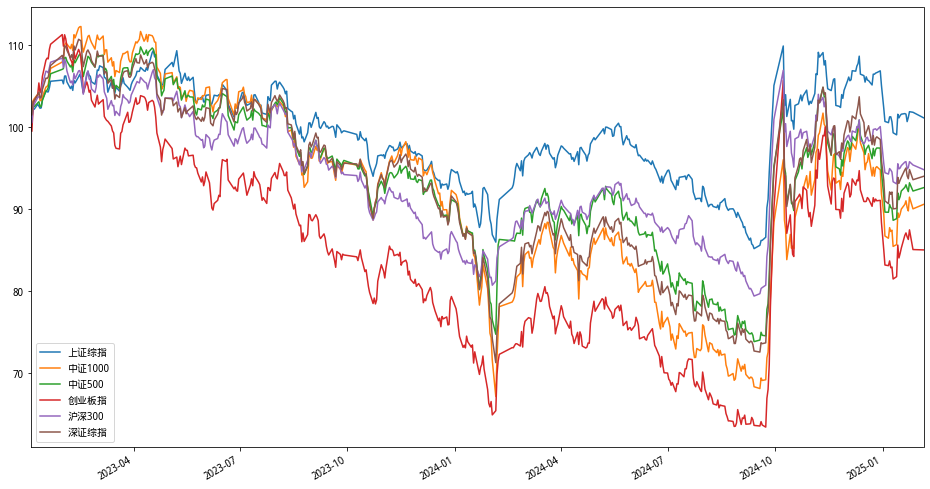

In [46]:
((1 + index_retx_df.loc['2023':'2025']).cumprod()*100).plot()

In [47]:
index_retx_df.describe()

上证综指       中证1000        中证500         创业板指        沪深300  \
count  6077.000000  4877.000000  4877.000000  3563.000000  5597.000000   
mean      0.000169     0.000462     0.000437     0.000298     0.000231   
std       0.014731     0.019205     0.018392     0.019411     0.015796   
min      -0.088484    -0.087943    -0.089605    -0.106009    -0.092478   
25%      -0.006388    -0.008100    -0.007707    -0.010035    -0.007165   
50%       0.000415     0.001706     0.001320    -0.000067     0.000338   
75%       0.006978     0.010933     0.010310     0.010641     0.007603   
max       0.098516     0.111368     0.104043     0.172426     0.093851   

              深证综指  
count  6077.000000  
mean      0.000318  
std       0.016806  
min      -0.086526  
25%      -0.007583  
50%       0.001122  
75%       0.009231  
max       0.109229

In [48]:
0.019465*np.sqrt(240) # 2023计算

0.3015504833357095

In [49]:
0.015047*np.sqrt(240) # 2023计算

0.23310712164153202

In [50]:
0.019188*np.sqrt(240) # 2024 中证1000波动率

0.29725921778811165

In [54]:
index_retx_df['2022':].describe()

上证综指      中证1000       中证500        创业板指       沪深300        深证综指
count  745.000000  745.000000  745.000000  745.000000  745.000000  745.000000
mean    -0.000167   -0.000345   -0.000328   -0.000530   -0.000348   -0.000325
std      0.010629    0.016289    0.014050    0.018813    0.011793    0.014738
min     -0.066238   -0.078171   -0.068289   -0.106009   -0.070582   -0.086526
25%     -0.005434   -0.008425   -0.007399   -0.010846   -0.006793   -0.007679
50%     -0.000303    0.000420   -0.000485   -0.001730   -0.001235   -0.000463
75%      0.005331    0.008007    0.006674    0.007566    0.005268    0.006875
max      0.080569    0.111368    0.104043    0.172426    0.084758    0.109229

In [55]:
0.016289*np.sqrt(240) # 2025 计算 2022至今中证1000年化波动率

0.2523481029054905

In [56]:
0.011793*np.sqrt(240) # 2025 计算 2022至今沪深300年化波动率

0.18269637040729628

## Market return in US

In [59]:
us_df = pd.read_csv('./data/F-F_Research_Data_Factors_daily_2025.csv',skiprows=3)
us_df.drop(us_df.index.values[-1],inplace=True)

In [60]:
us_df.head()

Unnamed: 0  Mkt-RF   SMB   HML     RF
0   19260701    0.10 -0.25 -0.27  0.009
1   19260702    0.45 -0.33 -0.06  0.009
2   19260706    0.17  0.30 -0.39  0.009
3   19260707    0.09 -0.58  0.02  0.009
4   19260708    0.21 -0.38  0.19  0.009

In [61]:
us_df.rename(columns={'Unnamed: 0': 'date'},inplace=True)

In [62]:
us_df['date'] = pd.to_datetime(us_df['date'],format='%Y%m%d')

In [63]:
us_df['Mkt-RF'] = us_df['Mkt-RF']*0.01
us_df.set_index('date',inplace=True)

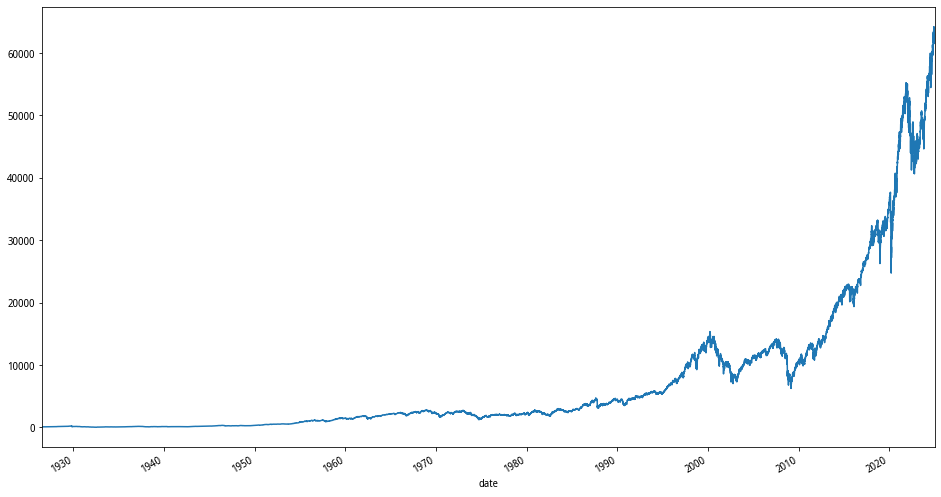

In [66]:
((1 + us_df.loc['1926':'2025','Mkt-RF']).cumprod()*100).plot()

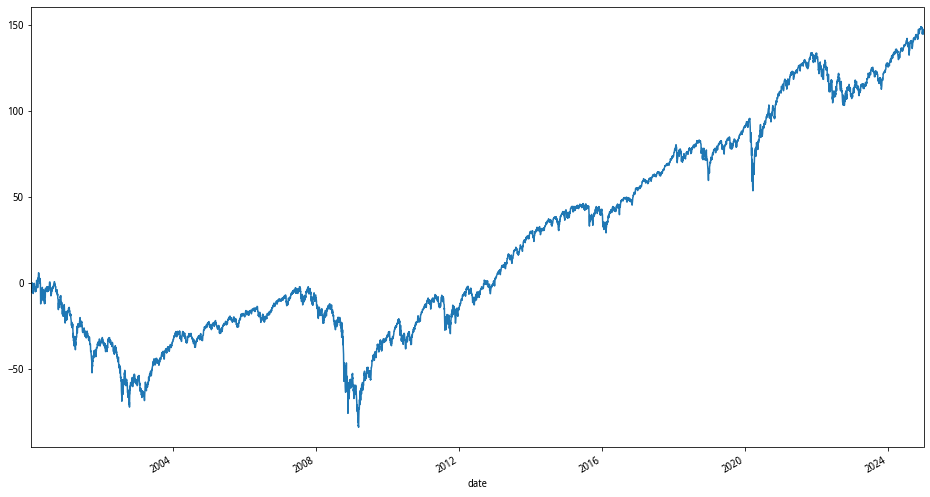

In [67]:
(np.log(1 + us_df.loc['2000':'2025','Mkt-RF']).cumsum()*100).plot()

In [68]:
us_df.loc['2000':'2025','Mkt-RF'].describe()

count    6289.000000
mean        0.000307
std         0.012399
min        -0.120000
25%        -0.004900
50%         0.000600
75%         0.006100
max         0.113500
Name: Mkt-RF, dtype: float64

In [58]:
0.012682*np.sqrt(250) # 2023 波动率

0.20052002643127695

In [69]:
0.012525*np.sqrt(250) # 2024 

0.19803763846804476

In [71]:
0.012399*np.sqrt(250) # 2025

0.19604540354213867

## Industry Index Return

In [74]:
# 2025, https://www.swsresearch.com/institute_sw/allIndex/downloadCenter/industryType

shenwan_industry_idx1 = ["农林牧渔","基础化工","钢铁","有色金属","电子","家用电器","食品饮料","纺织服饰","轻工制造","医药生物","公用事业","交通运输","房地产","商贸零售","社会服务","综合","建筑材料","建筑装饰","电力设备","国防军工","计算机","传媒","通信","银行","非银金融","汽车","机械设备","煤炭","石油石化","环保","美容护理"]

# shenwan_industry_idx1 = ['传媒','电力设备','电子','房地产','纺织服饰','非银金融','钢铁','公用事业','国防军工','环保','机械设备','基础化工','计算机','家用电器','建筑材料','建筑装饰','交通运输','煤炭','美容护理','农林牧渔','社会服务','石油石化','食品饮料','汽车','轻工制造','通信','综合','医药生物','银行','有色金属','商贸零售'] 

# shenwan_industry_idx1 = ["农林牧渔","基础化工","钢铁","有色金属","电子","家用电器","食品饮料","纺织服饰","轻工制造","医药生物","公用事业","交通运输","房地产","商贸零售","社会服务","综合","建筑材料","建筑装饰","电力设备","国防军工","计算机","传媒","通信","银行","非银金融","汽车","机械设备","煤炭","石油石化","环保","美容护理"]

In [75]:
len(shenwan_industry_idx1)

31

In [76]:
index_info['secShortName']

0               易盛农期综指
1                 上证综指
2               易盛农期谷物
3                 上证A股
4               易盛农期软商
5                 上证B股
6               易盛农期油脂
7                 上证工业
8               易盛农期强麦
9                 上证商业
10              易盛农期早籼
11                上证地产
12              易盛农期棉花
13                上证公用
14              易盛农期白糖
15                上证综合
16              易盛农期菜油
17               上证380
18              易盛农期菜粕
19               上证180
20              易盛农期棉纱
21                上证基金
22                上证国债
23                企债指数
24                上证红利
25                上证50
26               上证新综指
27             上证180金融
28              上证治理指数
29              上证中型综指
             ...      
24074           恒生深港指数
24075           恒生深港基运
24076           恒生深港房产
24077           恒生深港资讯
24078             深证成指
24079         特拉维夫TA35
24080           台湾加权指数
24081        沙特阿拉伯TASI
24082          恒指ESG增强
24083        恒指ESG增强精选
24084             东证指数
24085       中华港股通价值全收益
24086      

In [77]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万'))]

7393            申万50
7394            申万中小
7395            申万A指
7396            申万创业
7397          申万A股主板
7398        申万宏源专精特新
7399          申万农林牧渔
7400           申万林业Ⅱ
7401         申万农产品加工
7402         申万农业综合Ⅱ
7403            申万饲料
7404            申万渔业
7405           申万种植业
7406           申万养殖业
7407         申万动物保健Ⅱ
7408         申万农业综合Ⅱ
7409            申万采掘
7410         申万煤炭开采Ⅱ
7411         申万其他采掘Ⅱ
7412         申万石油开采Ⅱ
7413          申万采掘服务
7414          申万基础化工
7415        申万化工新材料Ⅱ
7416          申万化学纤维
7417          申万化学原料
7418          申万化学制品
7419          申万石油化工
7420            申万塑料
7421            申万橡胶
7422          申万农化制品
            ...     
19520    通联全A-申万有色金属
19521    通联全A-申万建筑材料
19522    通联全A-申万建筑装饰
19523    通联全A-申万电气设备
19524    通联全A-申万机械设备
19525    通联全A-申万国防军工
19526      通联全A-申万汽车
19527      通联全A-申万电子
19528    通联全A-申万家用电器
19529    通联全A-申万食品饮料
19530    通联全A-申万纺织服装
19531    通联全A-申万轻工制造
19532    通联全A-申万医药生物
19533    通联全A-申万公用事业
19534    通联全A-申万交通运输
19535     通联全A-申万房地产
19536      通联

In [78]:
shenwan_industry_idx1 = ['申万' + indry for indry in shenwan_industry_idx1]

In [79]:
shenwan_industry_idx1

['申万农林牧渔',
 '申万基础化工',
 '申万钢铁',
 '申万有色金属',
 '申万电子',
 '申万家用电器',
 '申万食品饮料',
 '申万纺织服饰',
 '申万轻工制造',
 '申万医药生物',
 '申万公用事业',
 '申万交通运输',
 '申万房地产',
 '申万商贸零售',
 '申万社会服务',
 '申万综合',
 '申万建筑材料',
 '申万建筑装饰',
 '申万电力设备',
 '申万国防军工',
 '申万计算机',
 '申万传媒',
 '申万通信',
 '申万银行',
 '申万非银金融',
 '申万汽车',
 '申万机械设备',
 '申万煤炭',
 '申万石油石化',
 '申万环保',
 '申万美容护理']

In [80]:
len(shenwan_industry_idx1)

31

In [81]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万')) & 
                           (~index_info['secShortName'].str.contains('Ⅱ$'))]

7393            申万50
7394            申万中小
7395            申万A指
7396            申万创业
7397          申万A股主板
7398        申万宏源专精特新
7399          申万农林牧渔
7401         申万农产品加工
7403            申万饲料
7404            申万渔业
7405           申万种植业
7406           申万养殖业
7409            申万采掘
7413          申万采掘服务
7414          申万基础化工
7416          申万化学纤维
7417          申万化学原料
7418          申万化学制品
7419          申万石油化工
7420            申万塑料
7421            申万橡胶
7422          申万农化制品
7424            申万钢铁
7426          申万冶钢原料
7427            申万普钢
7429          申万有色金属
7430         申万金属新材料
7432           申万贵金属
7433           申万小金属
7434          申万工业金属
            ...     
19520    通联全A-申万有色金属
19521    通联全A-申万建筑材料
19522    通联全A-申万建筑装饰
19523    通联全A-申万电气设备
19524    通联全A-申万机械设备
19525    通联全A-申万国防军工
19526      通联全A-申万汽车
19527      通联全A-申万电子
19528    通联全A-申万家用电器
19529    通联全A-申万食品饮料
19530    通联全A-申万纺织服装
19531    通联全A-申万轻工制造
19532    通联全A-申万医药生物
19533    通联全A-申万公用事业
19534    通联全A-申万交通运输
19535     通联全A-申万房地产
19536      通联

In [82]:
index_info['secShortName'][index_info['secShortName'].str.contains('.*^申万Ⅰ$')]

Series([], Name: secShortName, dtype: object)

这个正则表达式 `.*^申万Ⅰ$` 可以分解如下：

1. `.*`: 表示匹配任意字符（除了行终止符）零次或多次。`.` 匹配任意单个字符，`*` 表示前一个字符或组的零次或多次出现。

2. `^`: 这是一个插入符号，表示行的开头。

3. `申万Ⅰ`: 这部分表示精确匹配字符序列 "申万Ⅰ"。

4. `$`: 这个美元符号表示行的结尾。

因此，将所有部分放在一起，这个正则表达式匹配以任意字符开头，接着是精确的序列 "申万Ⅰ"，然后紧跟着行结束。

In [83]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
7399  801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
7414  801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
7424  801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
7429  801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
7448  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
7467  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
7475  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   
7483  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
7487  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
7493  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
7500  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
7505  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
7515  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
7524  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
7532  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
7547  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
7559  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
7570  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
7574  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
7581  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
7590  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
7596  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
7599  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
7607  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
7608  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
7614  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
7633  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
7635  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
7639  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
7642  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
7646  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
7649  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
7399            L  2003-10-15         CNY  NaN  27540.0         NaN  
7414            L  2003-10-15         CNY  NaN  27540.0         NaN  
7424            L  2003-10-15         CNY  NaN  27540.0         NaN  
7429            L  2003-10-15         CNY  NaN  27540.0         NaN  
7448            L  2003-10-15         CNY  NaN  27540.0         NaN  
7467            L  2003-10-15         CNY  NaN  27540.0         NaN  
7475            L  2003-10-15         CNY  NaN  27540.0         NaN  
7483            L  2003-10-15         CNY  NaN  27540.0         NaN  
7487            L  2003-10-15         CNY  NaN  27540.0         NaN  
7493            L  2003-10-15         CNY  NaN  27540.0         NaN  
7500            L  2003-10-15         CNY  NaN  27540.0         NaN  
7505            L  2003-10-15         CNY  NaN  27540.0         NaN  
7515            L  2003-10-15         CNY  NaN  27540.0         NaN  
7524            L  2003-10-15         CNY  NaN  27540.0         NaN  
7532            L  2003-10-15         CNY  NaN  27540.0         NaN  
7547            L  2003-10-15         CNY  NaN  27540.0         NaN  
7559           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
7570            L  2014-02-21         CNY  NaN  27540.0         NaN  
7574            L  2014-02-21         CNY  NaN  27540.0         NaN  
7581            L  2014-02-21         CNY  NaN  27540.0         NaN  
7590            L  2014-02-21         CNY  NaN  27540.0         NaN  
7596            L  2014-02-21         CNY  NaN  27540.0         NaN  
7599            L  2014-0

In [84]:
len(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)])

32

In [85]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)].duplicated('secShortName',keep=False)

7399    False
7414     True
7424    False
7429    False
7448    False
7467    False
7475    False
7483    False
7487    False
7493    False
7500    False
7505    False
7515    False
7524    False
7532    False
7547    False
7559     True
7570    False
7574    False
7581    False
7590    False
7596    False
7599    False
7607    False
7608    False
7614    False
7633    False
7635    False
7639    False
7642    False
7646    False
7649    False
dtype: bool

In [86]:
set(shenwan_industry_idx1) - set(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]['secShortName'])

set()

In [87]:
set(shenwan_industry_idx1).symmetric_difference(set(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]['secShortName']))

set()

#### The Industry index by Shenwan

In [88]:
index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].sort_values('secShortName')

secID  ticker secShortName cnSpell exchangeCD assetClass  \
7505  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
7599  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
7500  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
7399  801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
7493  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
7524  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
7590  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
7559  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
7414  801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
7467  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
7570  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
7574  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
7515  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
7429  801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
7635  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
7633  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
7639  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
7646  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
7581  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
7448  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
7642  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
7532  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
7483  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
7547  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
7649  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   
7596  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
7487  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
7607  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
7424  801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
7608  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
7614  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
7475  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
7505            L  2003-10-15         CNY  NaN  27540.0         NaN  
7599            L  2014-02-21         CNY  NaN  27540.0         NaN  
7500            L  2003-10-15         CNY  NaN  27540.0         NaN  
7399            L  2003-10-15         CNY  NaN  27540.0         NaN  
7493            L  2003-10-15         CNY  NaN  27540.0         NaN  
7524            L  2003-10-15         CNY  NaN  27540.0         NaN  
7590            L  2014-02-21         CNY  NaN  27540.0         NaN  
7559           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
7414            L  2003-10-15         CNY  NaN  27540.0         NaN  
7467            L  2003-10-15         CNY  NaN  27540.0         NaN  
7570            L  2014-02-21         CNY  NaN  27540.0         NaN  
7574            L  2014-02-21         CNY  NaN  27540.0         NaN  
7515            L  2003-10-15         CNY  NaN  27540.0         NaN  
7429            L  2003-10-15         CNY  NaN  27540.0         NaN  
7635            L  2014-02-21         CNY  NaN  27540.0         NaN  
7633            L  2014-02-21         CNY  NaN  27540.0         NaN  
7639            L  2021-12-13         CNY  NaN  27540.0         NaN  
7646            L  2021-12-13         CNY  NaN  27540.0         NaN  
7581            L  2014-02-21         CNY  NaN  27540.0         NaN  
7448            L  2003-10-15         CNY  NaN  27540.0         NaN  
7642            L  2021-12-13         CNY  NaN  27540.0         NaN  
7532            L  2003-10-15         CNY  NaN  27540.0         NaN  
7483            L  2003-1

In [89]:
industry_id = index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].drop_duplicates(keep='last').loc[:,'secID']

In [90]:
industry_id

7399    801010.ZICN
7414    801030.ZICN
7424    801040.ZICN
7429    801050.ZICN
7448    801080.ZICN
7467    801110.ZICN
7475    801120.ZICN
7483    801130.ZICN
7487    801140.ZICN
7493    801150.ZICN
7500    801160.ZICN
7505    801170.ZICN
7515    801180.ZICN
7524    801200.ZICN
7532    801210.ZICN
7547    801230.ZICN
7559    801290.ZICN
7570    801710.ZICN
7574    801720.ZICN
7581    801730.ZICN
7590    801740.ZICN
7596    801750.ZICN
7599    801760.ZICN
7607    801770.ZICN
7608    801780.ZICN
7614    801790.ZICN
7633    801880.ZICN
7635    801890.ZICN
7639    801950.ZICN
7642    801960.ZICN
7646    801970.ZICN
7649    801980.ZICN
Name: secID, dtype: object

In [91]:
index_df = DataAPI.MktIdxdGet(indexID=list(industry_id) + ['000001.ZICN'],beginDate="20031015",endDate="20251231",
                              field=['indexID','secShortName','tradeDate','preCloseIndex',
                                     'closeIndex','turnoverVol','turnoverValue','CHG','CHGPct'],pandas="1")
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
index_ret_df = index_df.pivot(index='tradeDate',columns='indexID',values='CHGPct')
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

In [92]:
industry_id_name = dict(zip(index_df['indexID'],index_df['secShortName']))

In [93]:
industry_id_name

{'000001.ZICN': '上证综指',
 '801010.ZICN': '申万农林牧渔',
 '801030.ZICN': '申万基础化工',
 '801040.ZICN': '申万钢铁',
 '801050.ZICN': '申万有色金属',
 '801080.ZICN': '申万电子',
 '801110.ZICN': '申万家用电器',
 '801120.ZICN': '申万食品饮料',
 '801130.ZICN': '申万纺织服饰',
 '801140.ZICN': '申万轻工制造',
 '801150.ZICN': '申万医药生物',
 '801160.ZICN': '申万公用事业',
 '801170.ZICN': '申万交通运输',
 '801180.ZICN': '申万房地产',
 '801200.ZICN': '申万商贸零售',
 '801210.ZICN': '申万社会服务',
 '801230.ZICN': '申万综合',
 '801290.ZICN': '申万基础化工',
 '801710.ZICN': '申万建筑材料',
 '801720.ZICN': '申万建筑装饰',
 '801730.ZICN': '申万电力设备',
 '801740.ZICN': '申万国防军工',
 '801750.ZICN': '申万计算机',
 '801760.ZICN': '申万传媒',
 '801770.ZICN': '申万通信',
 '801780.ZICN': '申万银行',
 '801790.ZICN': '申万非银金融',
 '801880.ZICN': '申万汽车',
 '801890.ZICN': '申万机械设备',
 '801950.ZICN': '申万煤炭',
 '801960.ZICN': '申万石油石化',
 '801970.ZICN': '申万环保',
 '801980.ZICN': '申万美容护理'}

In [94]:
index_df.head()

indexID secShortName  tradeDate  preCloseIndex  closeIndex  \
0  000001.ZICN         上证综指 2003-10-15       1388.172    1383.098   
1  000001.ZICN         上证综指 2003-10-16       1383.098    1365.505   
2  000001.ZICN         上证综指 2003-10-17       1365.505    1370.582   
3  000001.ZICN         上证综指 2003-10-20       1370.582    1359.498   
4  000001.ZICN         上证综指 2003-10-21       1359.498    1364.301   

   turnoverVol  turnoverValue     CHG    CHGPct  
0  671017300.0   4.772951e+09  -5.074 -0.003655  
1  585887500.0   4.463241e+09 -17.593 -0.012720  
2  528554800.0   3.893039e+09   5.077  0.003718  
3  535722900.0   3.759462e+09 -11.084 -0.008087  
4  697888200.0   4.787531e+09   4.803  0.003533

In [95]:
index_retx_df.head()

000001.ZICN  801010.ZICN  801030.ZICN  801040.ZICN  801050.ZICN  \
2003-10-15    -0.003730    -0.004897    -0.002104    -0.000692    -0.002423   
2003-10-16    -0.012795    -0.016645    -0.012041    -0.008257    -0.000605   
2003-10-17     0.003643     0.000658     0.003923     0.006985    -0.000429   
2003-10-20    -0.008162    -0.007592    -0.007508     0.004683    -0.004754   
2003-10-21     0.003459     0.004975     0.002568     0.011718     0.008316   

            801080.ZICN  801110.ZICN  801120.ZICN  801130.ZICN  801140.ZICN  \
2003-10-15    -0.000160    -0.000950    -0.000379    -0.000555    -0.006021   
2003-10-16    -0.020983    -0.016202    -0.010727    -0.009225    -0.013666   
2003-10-17     0.003418     0.003256     0.001005    -0.000261     0.003411   
2003-10-20    -0.007695    -0.015114    -0.002786    -0.009900    -0.012482   
2003-10-21     0.006414     0.004014     0.001007    -0.000533    -0.000052   

            ...  801760.ZICN  801770.ZICN  801780.ZICN  801790.ZICN  \
2003-10-15  ...    -0.002227    -0.004183    -0.009015    -0.000382   
2003-10-16  ...    -0.038934    -0.010622    -0.007758    -0.011809   
2003-10-17  ...     0.003991     0.007493     0.001992    -0.008172   
2003-10-20  ...    -0.013761    -0.008072    -0.007533    -0.041855   
2003-10-21  ...     0.007289     0.004209    -0.015599    -0.002442   

            801880.ZICN  801890.ZICN  801950.ZICN  801960.ZICN  801970.ZICN  \
2003-10-15    -0.008126    -0.007362    -0.005163    -0.005211    -0.002654   
2003-10-16    -0.017021    -0.010059    -0.010085    -0.012954    -0.013539   
2003-10-17    -0.001675    -0.001646     0.002263     0.005544     0.004435   
2003-10-20    -0.008665    -0.012472     0.003845    -0.003705    -0.009598   
2003-10-21     0.002693     0.000308     0.003843     0.004290    -0.000925   

            801980.ZICN  
2003-10-15     0.000467  
2003-10-16    -0.024300  
2003-10-17     0.001165  
2003-10-20    -0.020807  
2003-10-21    -0.000008  

[5 rows x 33 columns]

In [96]:
index_retx_df.rename(mapper=industry_id_name, axis=1, inplace=True) # 将column名称改变

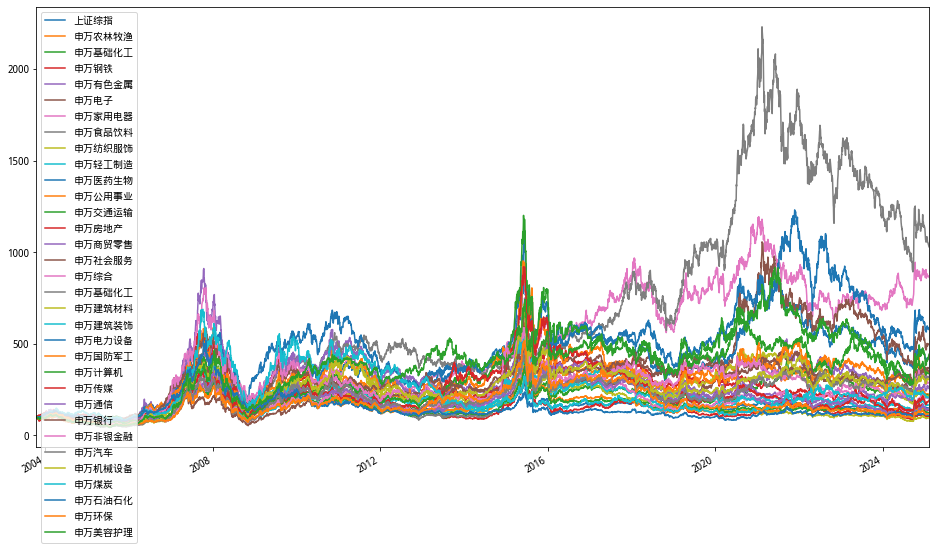

In [97]:
((1 + index_retx_df).cumprod()*100).plot()

In [98]:
industry_id_name_list = list(industry_id_name.values())

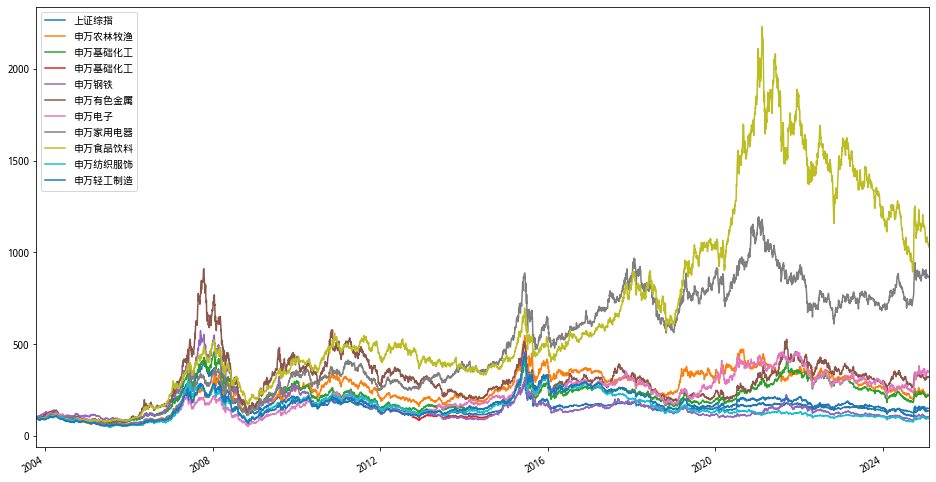

In [99]:
((1 + index_retx_df.loc[:,industry_id_name_list[0:10]]).cumprod()*100).plot()

食品饮料，家用电器

In [100]:
((1 + index_retx_df.loc[:,industry_id_name_list[10:20]]).cumprod()*100).plot()

社会服务，医药生物

In [101]:
((1 + index_retx_df.loc[:,industry_id_name_list[20:32]]).cumprod()*100).plot()

电力设备

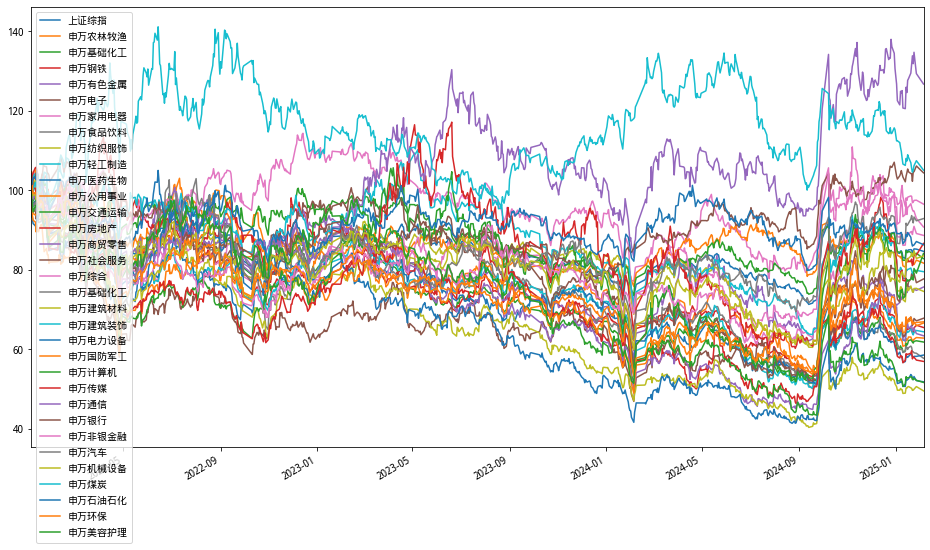

In [103]:
((1 + index_retx_df['2022':'2025']).cumprod()*100).plot()

#### 食品饮料, 家用电器，社会服务，医药生物，电力设备

In [105]:
cols = ['上证综指','申万食品饮料','申万家用电器','申万社会服务','申万医药生物','申万电力设备']

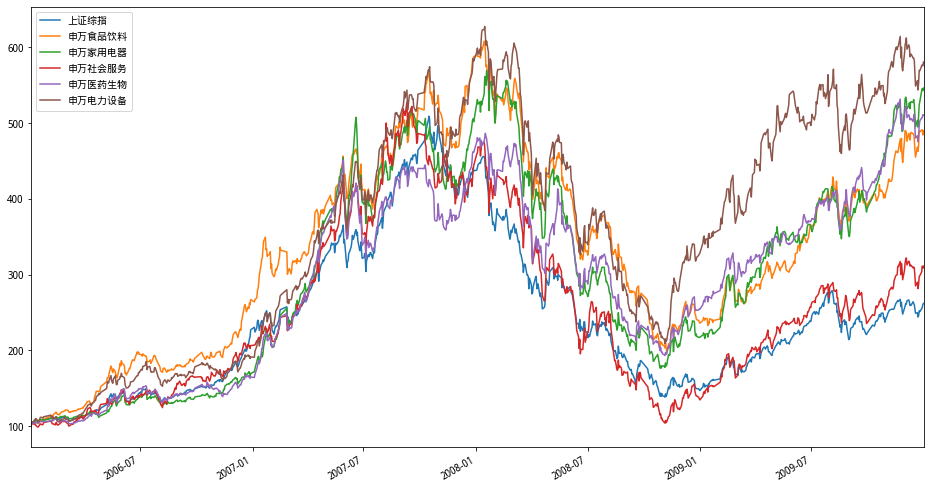

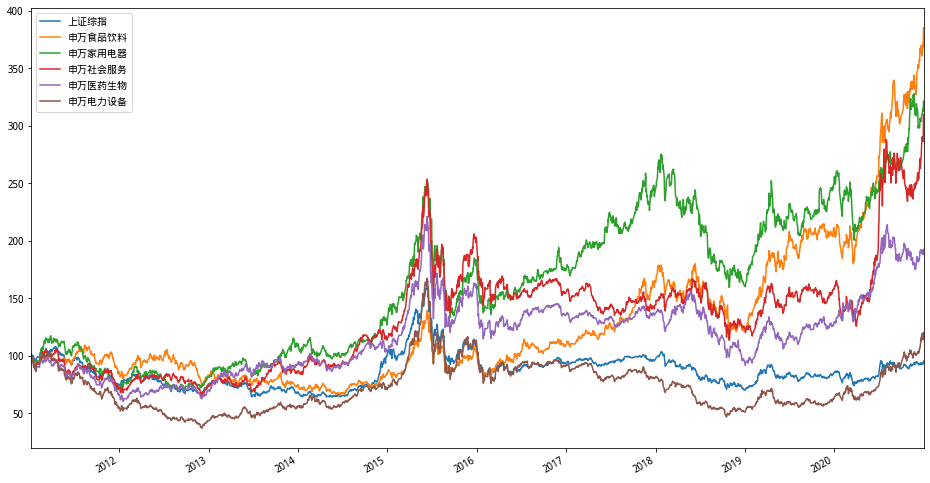

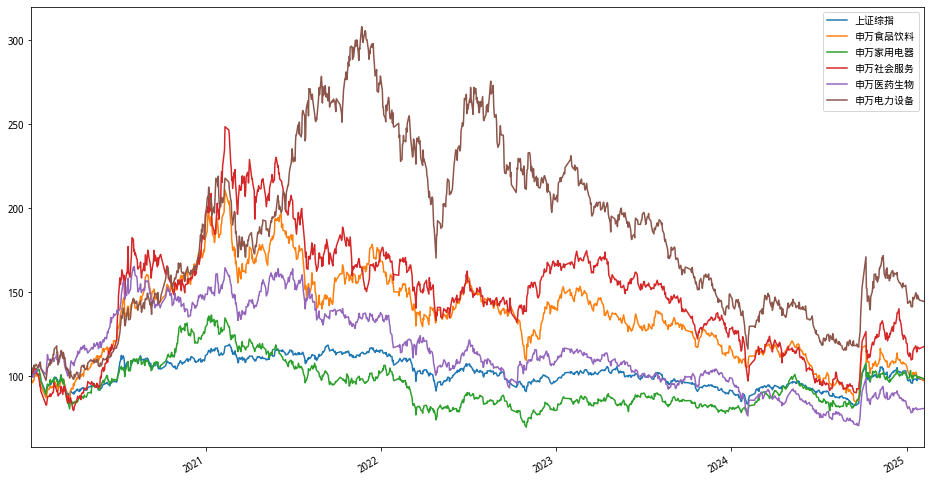

In [106]:
((1 + index_retx_df.loc['2003':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2008':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2006':'2009',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2011':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2018':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2020':'2025',cols]).cumprod()*100).plot()

# Individual Stocks

观察以下几个指标：
- 股票数目
- 市值
- 成交额
- 换手率

按照以下几种分组：
- 沪深两市
- 板块
- 市值

In [107]:
# %%time
# # Need about 5 mins to read. Data size is about 530 MB.
# stk_df = DataAPI.MktEqudAdjAfGet(secID=stk_id,beginDate="20170101",endDate="20251231",isOpen=1,
#                                            field=["secID","secShortName","exchangeCD","tradeDate",
#                                                   "preClosePrice","closePrice","turnoverVol",
#                                                   "turnoverValue","dealAmount","turnoverRate",
#                                                   "negMarketValue","marketValue"],pandas="1")

CPU times: user 28.5 s, sys: 2.23 s, total: 30.8 s
Wall time: 5min 35s


In [109]:
# stk_df.to_pickle('./data/stk_df.pkl')

In [110]:
stk_df = pd.read_pickle('./data/stk_df.pkl')

In [111]:
stk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798212 entries, 0 to 5798211
Data columns (total 12 columns):
secID             object
secShortName      object
exchangeCD        object
tradeDate         object
preClosePrice     float64
closePrice        float64
turnoverVol       int64
turnoverValue     float64
dealAmount        float64
turnoverRate      float64
negMarketValue    float64
marketValue       float64
dtypes: float64(7), int64(1), object(4)
memory usage: 530.8+ MB


In [93]:
# stk_df.loc[(stk_df['tradeDate']>='2022-01-01') & (stk_df['tradeDate']<='2025-03-01')].to_pickle('./data/stk_df_22_25.pkl') # for exercise 1

In [112]:
stk_df.head()

secID secShortName exchangeCD   tradeDate  preClosePrice  closePrice  \
0  000001.XSHE         平安银行       XSHE  2017-01-03       1095.234    1102.456   
1  000001.XSHE         平安银行       XSHE  2017-01-04       1102.456    1102.456   
2  000001.XSHE         平安银行       XSHE  2017-01-05       1102.456    1103.659   
3  000001.XSHE         平安银行       XSHE  2017-01-06       1103.659    1098.845   
4  000001.XSHE         平安银行       XSHE  2017-01-09       1098.845    1101.252   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0       554399   4.205952e+08     13730.0        0.0031    1.340216e+11   
1       541727   4.115034e+08     11850.0        0.0031    1.340216e+11   
2       415188   3.157697e+08     11764.0        0.0024    1.341679e+11   
3       431803   3.271764e+08     14671.0        0.0024    1.335827e+11   
4       435332   3.299946e+08     12975.0        0.0021    1.547996e+11   

    marketValue  
0  1.572810e+11  
1  1.572810e+11  
2  1.574527e+11  
3  1.567659e+11  
4  1.571093e+11

In [113]:
sec_sector = DataAPI.EquGet(secID=stk_id,field=["secID","ListSector"],pandas="1")

In [96]:
# industry = DataAPI.EquIndustryGet(secID=stk_id,industryVersionCD="010303",field=['secID','industryName1',''],pandas="1")

# industry['industryName1'].unique()

# industry.drop_duplicates()

In [114]:
stk_df = pd.merge(stk_df, sec_sector, on="secID")

In [115]:
stk_df

secID secShortName exchangeCD   tradeDate  preClosePrice  \
0        000001.XSHE         平安银行       XSHE  2017-01-03       1095.234   
1        000001.XSHE         平安银行       XSHE  2017-01-04       1102.456   
2        000001.XSHE         平安银行       XSHE  2017-01-05       1102.456   
3        000001.XSHE         平安银行       XSHE  2017-01-06       1103.659   
4        000001.XSHE         平安银行       XSHE  2017-01-09       1098.845   
5        000001.XSHE         平安银行       XSHE  2017-01-10       1101.252   
6        000001.XSHE         平安银行       XSHE  2017-01-11       1101.252   
7        000001.XSHE         平安银行       XSHE  2017-01-12       1100.048   
8        000001.XSHE         平安银行       XSHE  2017-01-13       1101.252   
9        000001.XSHE         平安银行       XSHE  2017-01-16       1102.456   
10       000001.XSHE         平安银行       XSHE  2017-01-17       1100.048   
11       000001.XSHE         平安银行       XSHE  2017-01-18       1101.252   
12       000001.XSHE         平安银行       XSHE  2017-01-19       1103.659   
13       000001.XSHE         平安银行       XSHE  2017-01-20       1104.863   
14       000001.XSHE         平安银行       XSHE  2017-01-23       1109.677   
15       000001.XSHE         平安银行       XSHE  2017-01-24       1109.677   
16       000001.XSHE         平安银行       XSHE  2017-01-25       1115.695   
17       000001.XSHE         平安银行       XSHE  2017-01-26       1114.491   
18       000001.XSHE         平安银行       XSHE  2017-02-03       1122.916   
19       000001.XSHE         平安银行       XSHE  2017-02-06       1114.491   
20       000001.XSHE         平安银行       XSHE  2017-02-07       1120.509   
21       000001.XSHE         平安银行       XSHE  2017-02-08       1119.305   
22       000001.XSHE         平安银行       XSHE  2017-02-09       1119.305   
23       000001.XSHE         平安银行       XSHE  2017-02-10       1120.509   
24       000001.XSHE         平安银行       XSHE  2017-02-13       1122.916   
25       000001.XSHE         平安银行       XSHE  2017-02-14       1132.544   
26       000001.XSHE         平安银行       XSHE  2017-02-15       1131.341   
27       000001.XSHE         平安银行       XSHE  2017-02-16       1137.359   
28       000001.XSHE         平安银行       XSHE  2017-02-17       1138.562   
29       000001.XSHE         平安银行       XSHE  2017-02-20       1130.137   
...              ...          ...        ...         ...            ...   
5798182  920128.XBEI         胜业电气       XBEI  2025-01-06         29.740   
5798183  920128.XBEI         胜业电气       XBEI  2025-01-07         28.730   
5798184  920128.XBEI         胜业电气       XBEI  2025-01-08         30.930   
5798185  920128.XBEI         胜业电气       XBEI  2025-01-09         31.270   
5798186  920128.XBEI         胜业电气       XBEI  2025-01-10         32.010   
5798187  920128.XBEI         胜业电气       XBEI  2025-01-13         28.950   
5798188  920128.XBEI         胜业电气       XBEI  2025-01-14         27.760   
5798189  920128.XBEI         胜业电气       XBEI  2025-01-15         29.850   
5798190  920128.XBEI         胜业电气       XBEI  2025-01-16         29.010   
5798191  920128.XBEI         胜业电气       XBEI  2025-01-17         29.080   
5798192  920128.XBEI         胜业电气       XBEI  2025-01-20         29.120   
5798193  920128.XBEI         胜业电气       XBEI  2025-01-21         29.260   
5798194  920128.XBEI         胜业电气       XBEI  2025-01-22         29.060   
5798195  920128.XBEI         胜业电气       XBEI  2025-01-23         28.050   
5798196  920128.XBEI         胜业电气       XBEI  2025-01-24         27.940   
5798197  920128.XBEI         胜业电气       XBEI  2025-01-27         27.800   
5798198  920128.XBEI         胜业电气       XBEI  2025-02-05         27.770   
5798199  920128.XBEI         胜业电气       XBEI  2025-02-06         27.620   
5798200  920128.XBEI         胜业电气       XBEI  2025-02-07         28.500   
5798201  920128.XBEI         胜业电气       XBEI  2025-02-10         29.190   
5798202  920128.XBEI         胜业电气       XBEI  2025-02-11         29.460   
5798203  920128.XBEI         胜业电气       

In [116]:
stk_df['tradeDate'] = pd.to_datetime(stk_df['tradeDate'], format='%Y-%m-%d')

In [117]:
stk_df.set_index(['secID','tradeDate'],inplace=True)

In [118]:
stk_df['yearMonth'] = stk_df.index.get_level_values(1).to_period('M') # Change to Month

In [119]:
stk_df.head()

secShortName exchangeCD  preClosePrice  closePrice  \
secID       tradeDate                                                       
000001.XSHE 2017-01-03         平安银行       XSHE       1095.234    1102.456   
            2017-01-04         平安银行       XSHE       1102.456    1102.456   
            2017-01-05         平安银行       XSHE       1102.456    1103.659   
            2017-01-06         平安银行       XSHE       1103.659    1098.845   
            2017-01-09         平安银行       XSHE       1098.845    1101.252   

                        turnoverVol  turnoverValue  dealAmount  turnoverRate  \
secID       tradeDate                                                          
000001.XSHE 2017-01-03       554399   4.205952e+08     13730.0        0.0031   
            2017-01-04       541727   4.115034e+08     11850.0        0.0031   
            2017-01-05       415188   3.157697e+08     11764.0        0.0024   
            2017-01-06       431803   3.271764e+08     14671.0        0.0024   
            2017-01-09       435332   3.299946e+08     12975.0        0.0021   

                        negMarketValue   marketValue ListSector yearMonth  
secID       tradeDate                                                      
000001.XSHE 2017-01-03    1.340216e+11  1.572810e+11         主板   2017-01  
            2017-01-04    1.340216e+11  1.572810e+11         主板   2017-01  
            2017-01-05    1.341679e+11  1.574527e+11         主板   2017-01  
            2017-01-06    1.335827e+11  1.567659e+11         主板   2017-01  
            2017-01-09    1.547996e+11  1.571093e+11         主板   2017-01

In [120]:
q33 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.33)
q67 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.67)

In [121]:
q33.name = 'negMarketValue_q33'
q67.name = 'negMarketValue_q67'

In [122]:
q33

yearMonth
2017-01    4.016609e+09
2017-02    4.015856e+09
2017-03    4.018027e+09
2017-04    3.650602e+09
2017-05    3.246954e+09
2017-06    3.153969e+09
2017-07    3.124279e+09
2017-08    3.127743e+09
2017-09    3.251942e+09
2017-10    3.236291e+09
2017-11    2.968028e+09
2017-12    2.716798e+09
2018-01    2.727952e+09
2018-02    2.360119e+09
2018-03    2.603729e+09
2018-04    2.606398e+09
2018-05    2.620360e+09
2018-06    2.311567e+09
2018-07    2.194192e+09
2018-08    2.136036e+09
2018-09    2.075347e+09
2018-10    1.834246e+09
2018-11    2.013665e+09
2018-12    2.019013e+09
2019-01    1.995523e+09
2019-02    2.119910e+09
2019-03    2.506582e+09
2019-04    2.652451e+09
2019-05    2.310400e+09
2019-06    2.289465e+09
               ...     
2022-09    2.078264e+09
2022-10    1.987232e+09
2022-11    2.107974e+09
2022-12    2.064206e+09
2023-01    2.077218e+09
2023-02    2.241331e+09
2023-03    2.193501e+09
2023-04    2.123605e+09
2023-05    2.109046e+09
2023-06    2.120927e+09
2023-0

In [123]:
stk_df.reset_index(inplace=True)

In [124]:
stk_df = pd.merge(stk_df,q33,on='yearMonth')
stk_df = pd.merge(stk_df,q67,on='yearMonth')

In [125]:
stk_df

secID  tradeDate secShortName exchangeCD  preClosePrice  \
0        000001.XSHE 2017-01-03         平安银行       XSHE       1095.234   
1        000001.XSHE 2017-01-04         平安银行       XSHE       1102.456   
2        000001.XSHE 2017-01-05         平安银行       XSHE       1102.456   
3        000001.XSHE 2017-01-06         平安银行       XSHE       1103.659   
4        000001.XSHE 2017-01-09         平安银行       XSHE       1098.845   
5        000001.XSHE 2017-01-10         平安银行       XSHE       1101.252   
6        000001.XSHE 2017-01-11         平安银行       XSHE       1101.252   
7        000001.XSHE 2017-01-12         平安银行       XSHE       1100.048   
8        000001.XSHE 2017-01-13         平安银行       XSHE       1101.252   
9        000001.XSHE 2017-01-16         平安银行       XSHE       1102.456   
10       000001.XSHE 2017-01-17         平安银行       XSHE       1100.048   
11       000001.XSHE 2017-01-18         平安银行       XSHE       1101.252   
12       000001.XSHE 2017-01-19         平安银行       XSHE       1103.659   
13       000001.XSHE 2017-01-20         平安银行       XSHE       1104.863   
14       000001.XSHE 2017-01-23         平安银行       XSHE       1109.677   
15       000001.XSHE 2017-01-24         平安银行       XSHE       1109.677   
16       000001.XSHE 2017-01-25         平安银行       XSHE       1115.695   
17       000001.XSHE 2017-01-26         平安银行       XSHE       1114.491   
18       000002.XSHE 2017-01-03          万科A       XSHE       2495.594   
19       000002.XSHE 2017-01-04          万科A       XSHE       2517.453   
20       000002.XSHE 2017-01-05          万科A       XSHE       2532.026   
21       000002.XSHE 2017-01-06          万科A       XSHE       2541.741   
22       000002.XSHE 2017-01-09          万科A       XSHE       2506.524   
23       000002.XSHE 2017-01-10          万科A       XSHE       2508.953   
24       000002.XSHE 2017-01-11          万科A       XSHE       2499.237   
25       000002.XSHE 2017-01-13          万科A       XSHE       2477.378   
26       000002.XSHE 2017-01-16          万科A       XSHE       2648.609   
27       000002.XSHE 2017-01-17          万科A       XSHE       2550.242   
28       000002.XSHE 2017-01-18          万科A       XSHE       2525.954   
29       000002.XSHE 2017-01-19          万科A       XSHE       2540.527   
...              ...        ...          ...        ...            ...   
5798182  920116.XBEI 2025-02-21         星图测控       XBEI         64.490   
5798183  920116.XBEI 2025-02-24         星图测控       XBEI         63.980   
5798184  920118.XBEI 2025-02-05         太湖远大       XBEI         24.090   
5798185  920118.XBEI 2025-02-06         太湖远大       XBEI         24.090   
5798186  920118.XBEI 2025-02-07         太湖远大       XBEI         24.940   
5798187  920118.XBEI 2025-02-10         太湖远大       XBEI         25.640   
5798188  920118.XBEI 2025-02-11         太湖远大       XBEI         25.980   
5798189  920118.XBEI 2025-02-12         太湖远大       XBEI         26.780   
5798190  920118.XBEI 2025-02-13         太湖远大       XBEI         26.510   
5798191  920118.XBEI 2025-02-14         太湖远大       XBEI         25.500   
5798192  920118.XBEI 2025-02-17         太湖远大       XBEI         25.200   
5798193  920118.XBEI 2025-02-18         太湖远大       XBEI         25.600   
5798194  920118.XBEI 2025-02-19         太湖远大       XBEI         25.140   
5798195  920118.XBEI 2025-02-20         太湖远大       XBEI         25.680   
5798196  920118.XBEI 2025-02-21         太湖远大       XBEI         26.490   
5798197  920118.XBEI 2025-02-24         太湖远大       XBEI         26.420   
5798198  920128.XBEI 2025-02-05         胜业电气       XBEI         27.770   
5798199  920128.XBEI 2025-02-06         胜业电气       XBEI         27.620   
5798200  920128.XBEI 2025-02-07         胜业电气       XBEI         28.500   
5798201  920128.XBEI 2025-02-10         胜业电气       XBEI         29.190   
5798202  920128.XBEI 2025-02-11         胜业电气       XBEI         29.460   
5798203  920128.XBEI 2025-02-12         胜业电气       XBEI         29.990   
5798204  920128.XBE

In [126]:
stk_df['size'] = 'small'

stk_df.loc[(stk_df['negMarketValue'] > stk_df['negMarketValue_q33']) & (stk_df['negMarketValue'] <= stk_df['negMarketValue_q67']), 'size'] = 'medium'

stk_df.loc[stk_df['negMarketValue'] > stk_df['negMarketValue_q67'], 'size'] = 'large'

In [127]:
stk_df.head()

secID  tradeDate secShortName exchangeCD  preClosePrice  closePrice  \
0  000001.XSHE 2017-01-03         平安银行       XSHE       1095.234    1102.456   
1  000001.XSHE 2017-01-04         平安银行       XSHE       1102.456    1102.456   
2  000001.XSHE 2017-01-05         平安银行       XSHE       1102.456    1103.659   
3  000001.XSHE 2017-01-06         平安银行       XSHE       1103.659    1098.845   
4  000001.XSHE 2017-01-09         平安银行       XSHE       1098.845    1101.252   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0       554399   4.205952e+08     13730.0        0.0031    1.340216e+11   
1       541727   4.115034e+08     11850.0        0.0031    1.340216e+11   
2       415188   3.157697e+08     11764.0        0.0024    1.341679e+11   
3       431803   3.271764e+08     14671.0        0.0024    1.335827e+11   
4       435332   3.299946e+08     12975.0        0.0021    1.547996e+11   

    marketValue ListSector yearMonth  negMarketValue_q33  negMarketValue_q67  \
0  1.572810e+11         主板   2017-01        4.016609e+09        7.910029e+09   
1  1.572810e+11         主板   2017-01        4.016609e+09        7.910029e+09   
2  1.574527e+11         主板   2017-01        4.016609e+09        7.910029e+09   
3  1.567659e+11         主板   2017-01        4.016609e+09        7.910029e+09   
4  1.571093e+11         主板   2017-01        4.016609e+09        7.910029e+09   

    size  
0  large  
1  large  
2  large  
3  large  
4  large

## 股票数目

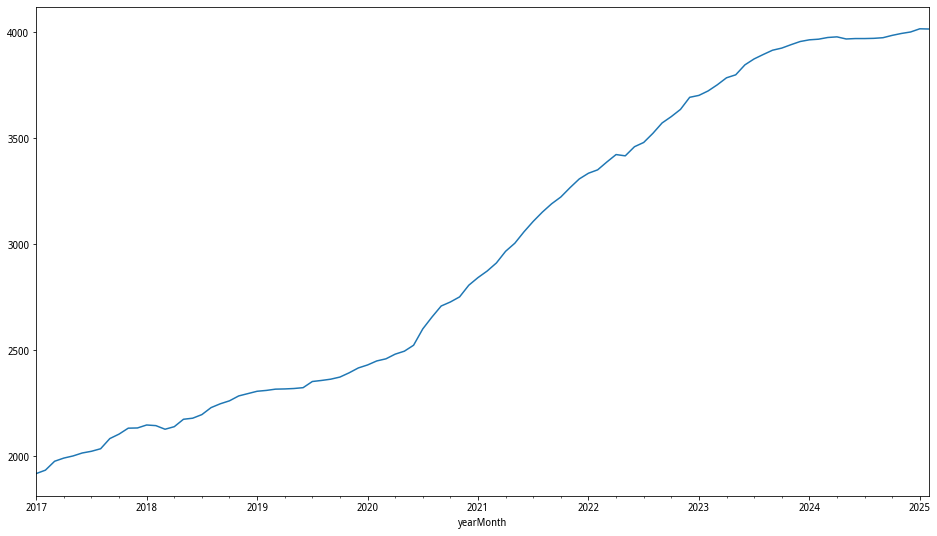

In [128]:
stk_df.groupby('yearMonth')['secShortName'].nunique().plot()

In [129]:
n_stk_by_list = stk_df.groupby(['ListSector','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='ListSector',values='secShortName')

In [130]:
n_stk_by_list

ListSector      主板     创业板    北交所    科创板
yearMonth                               
2017-01     1609.0   309.0    NaN    NaN
2017-02     1611.0   323.0    NaN    NaN
2017-03     1641.0   335.0    NaN    NaN
2017-04     1649.0   342.0    NaN    NaN
2017-05     1661.0   340.0    NaN    NaN
2017-06     1677.0   338.0    NaN    NaN
2017-07     1684.0   339.0    NaN    NaN
2017-08     1693.0   342.0    NaN    NaN
2017-09     1726.0   357.0    NaN    NaN
2017-10     1736.0   368.0    NaN    NaN
2017-11     1751.0   381.0    NaN    NaN
2017-12     1749.0   384.0    NaN    NaN
2018-01     1759.0   388.0    NaN    NaN
2018-02     1752.0   392.0    NaN    NaN
2018-03     1739.0   388.0    NaN    NaN
2018-04     1747.0   392.0    NaN    NaN
2018-05     1770.0   404.0    NaN    NaN
2018-06     1775.0   404.0    NaN    NaN
2018-07     1793.0   403.0    NaN    NaN
2018-08     1822.0   407.0    NaN    NaN
2018-09     1837.0   410.0    NaN    NaN
2018-10     1849.0   412.0    NaN    NaN
2018-11     1868.0   416.0    NaN    NaN
2018-12     1875.0   420.0    NaN    NaN
2019-01     1883.0   423.0    NaN    NaN
2019-02     1886.0   424.0    NaN    NaN
2019-03     1892.0   424.0    NaN    NaN
2019-04     1893.0   424.0    NaN    NaN
2019-05     1897.0   422.0    NaN    NaN
2019-06     1902.0   421.0    NaN    NaN
...            ...     ...    ...    ...
2022-09     2153.0   833.0  114.0  472.0
2022-10     2159.0   840.0  121.0  482.0
2022-11     2162.0   857.0  130.0  487.0
2022-12     2166.0   865.0  162.0  500.0
2023-01     2168.0   865.0  166.0  503.0
2023-02     2173.0   869.0  175.0  506.0
2023-03     2181.0   878.0  184.0  509.0
2023-04     2190.0   886.0  191.0  518.0
2023-05     2182.0   894.0  198.0  525.0
2023-06     2188.0   913.0  204.0  541.0
2023-07     2181.0   935.0  210.0  548.0
2023-08     2176.0   948.0  216.0  555.0
2023-09     2178.0   956.0  222.0  559.0
2023-10     2180.0   960.0  225.0  560.0
2023-11     2184.0   961.0  233.0  563.0
2023-12     2185.0   968.0  239.0  564.0
2024-01     2186.0   970.0  243.0  565.0
2024-02     2183.0   973.0  244.0  567.0
2024-03     2184.0   976.0  247.0  568.0
2024-04     2183.0   978.0  248.0  569.0
2024-05     2172.0   977.0  249.0  570.0
2024-06     2173.0   977.0  249.0  571.0
2024-07     2168.0   982.0  249.0  571.0
2024-08     2163.0   985.0  251.0  572.0
2024-09     2159.0   988.0  253.0  574.0
2024-10     2160.0   994.0  256.0  575.0
2024-11     2162.0   996.0  259.0  577.0
2024-12     2160.0  1000.0  262.0  579.0
2025-01     2166.0  1004.0  263.0  583.0
2025-02     2164.0  1004.0  264.0  583.0

[98 rows x 4 columns]

In [131]:
n_stk_by_list.plot()

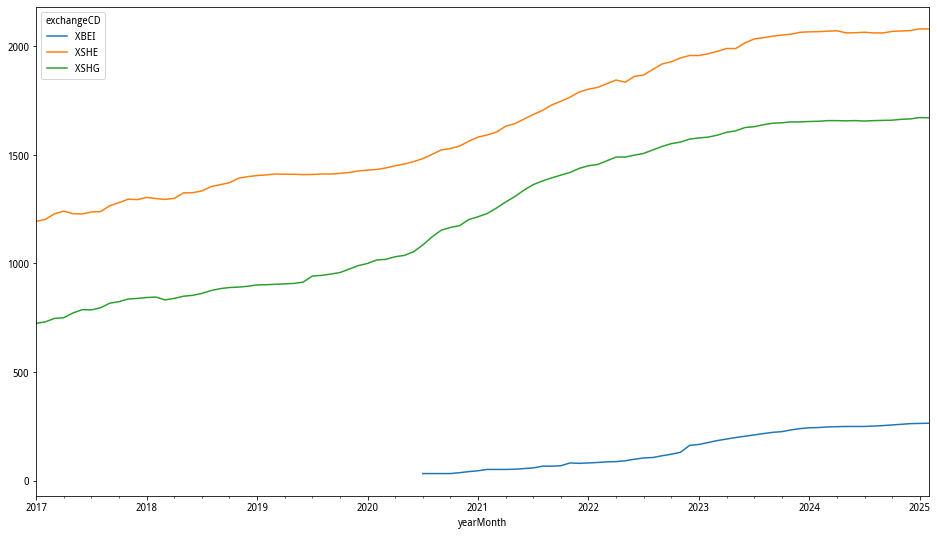

In [132]:
stk_df.groupby(['exchangeCD','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='secShortName').plot()

In [133]:
stk_df.groupby(['size','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='size',values='secShortName').plot()

## 总流通市值

In [134]:
stk_df.groupby(['yearMonth'])['negMarketValue'].sum()

yearMonth
2017-01    4.440495e+14
2017-02    4.539033e+14
2017-03    5.918891e+14
2017-04    4.563810e+14
2017-05    4.876579e+14
2017-06    5.514211e+14
2017-07    5.441500e+14
2017-08    6.116255e+14
2017-09    5.809548e+14
2017-10    4.814794e+14
2017-11    6.335619e+14
2017-12    5.893917e+14
2018-01    6.497347e+14
2018-02    4.120878e+14
2018-03    6.119925e+14
2018-04    4.884221e+14
2018-05    6.077343e+14
2018-06    5.213960e+14
2018-07    5.498757e+14
2018-08    5.646906e+14
2018-09    4.594682e+14
2018-10    4.127439e+14
2018-11    5.264996e+14
2018-12    4.745427e+14
2019-01    5.228928e+14
2019-02    3.939133e+14
2019-03    6.135224e+14
2019-04    6.519272e+14
2019-05    5.613817e+14
2019-06    5.423546e+14
               ...     
2022-09    9.209753e+14
2022-10    6.688762e+14
2022-11    9.507517e+14
2022-12    9.756075e+14
2023-01    7.341783e+14
2023-02    9.519358e+14
2023-03    1.092193e+15
2023-04    9.198783e+14
2023-05    9.521767e+14
2023-06    9.520110e+14
2023-0

In [135]:
(stk_df.groupby(['yearMonth'])['negMarketValue'].sum() / 1e12).plot()

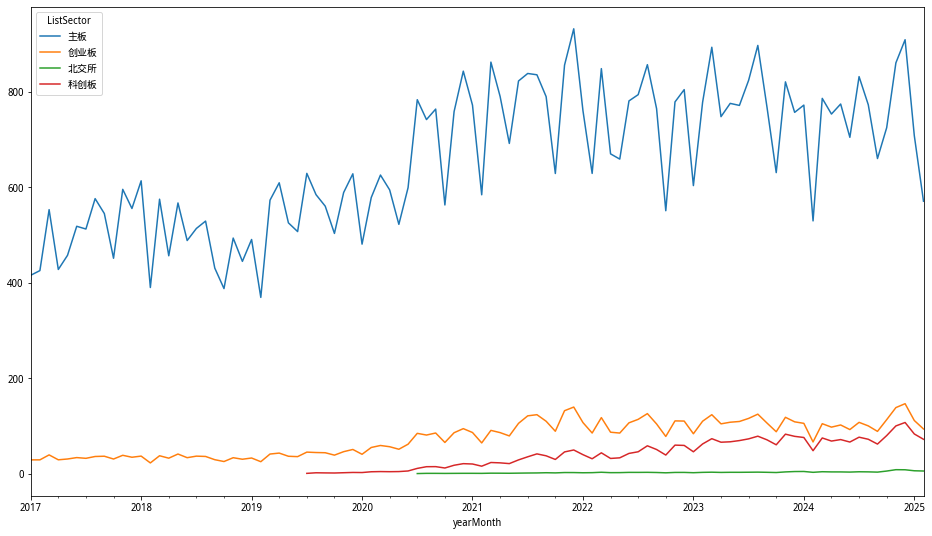

In [136]:
mkt_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='negMarketValue') / 1e12

mkt_value_by_sector.plot()

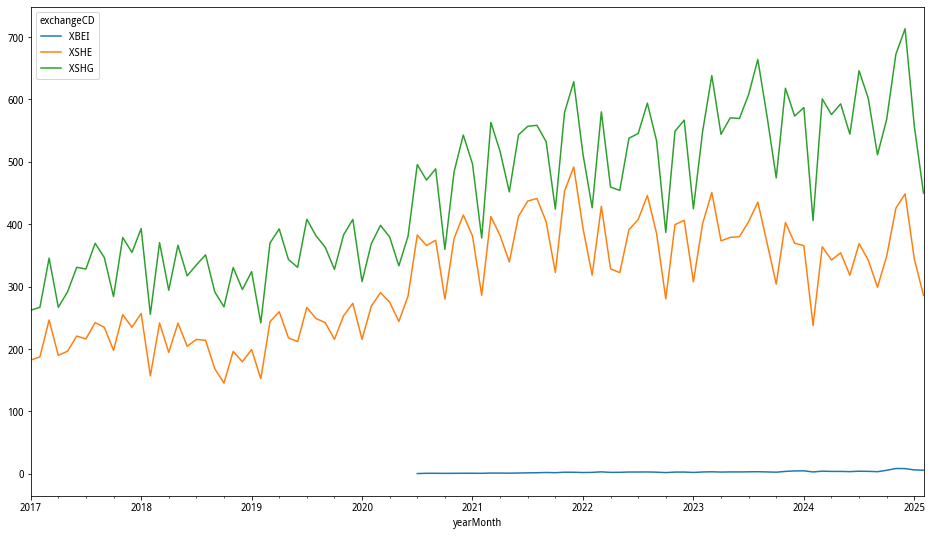

In [137]:
mkt_value_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

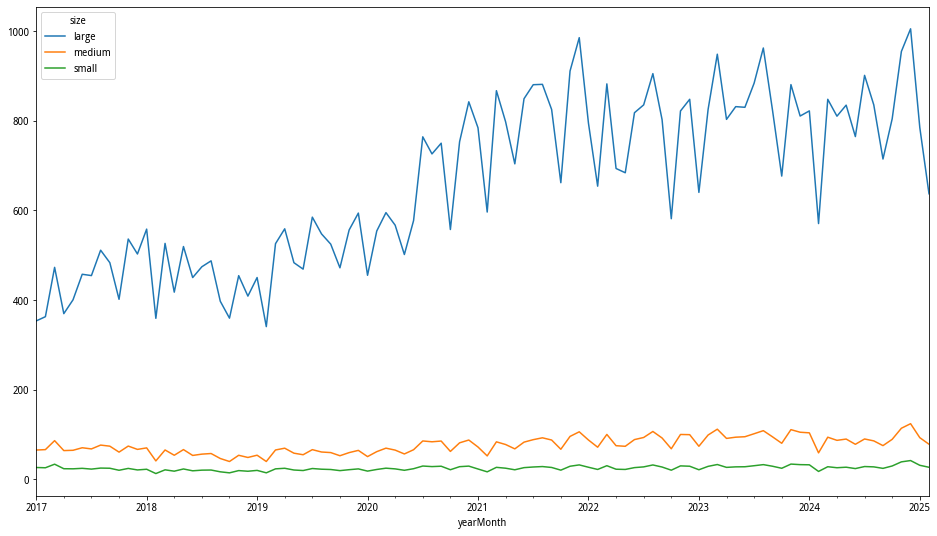

In [138]:
mkt_value_by_exch = stk_df.groupby(['size','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99fce13150>,
      dtype=object)

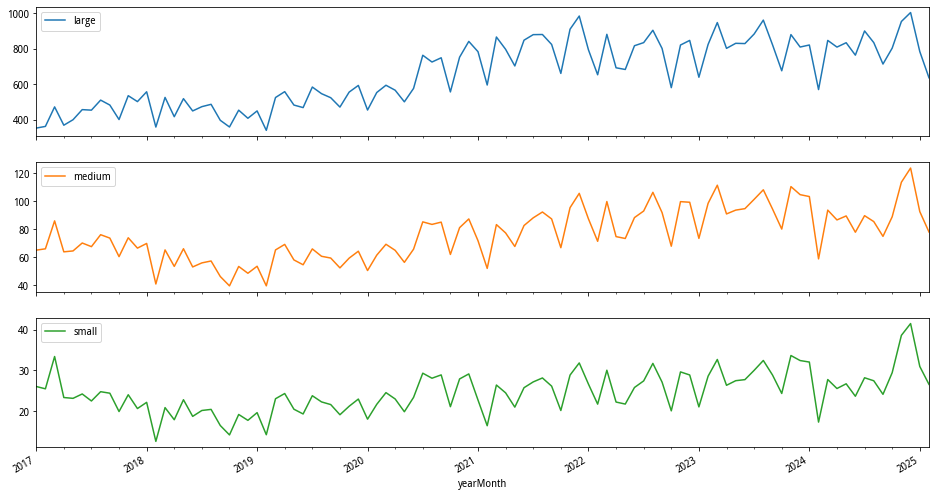

In [139]:
mkt_value_by_exch.plot(subplots=True)

## 总成交额

In [140]:
stk_df.groupby(['yearMonth'])['turnoverValue'].sum()

yearMonth
2017-01    4.185753e+12
2017-02    5.062166e+12
2017-03    7.385383e+12
2017-04    5.776229e+12
2017-05    5.031570e+12
2017-06    5.400257e+12
2017-07    6.263557e+12
2017-08    7.203477e+12
2017-09    7.006076e+12
2017-10    4.836178e+12
2017-11    7.077785e+12
2017-12    5.113827e+12
2018-01    7.338791e+12
2018-02    4.139472e+12
2018-03    6.314093e+12
2018-04    5.021820e+12
2018-05    5.599869e+12
2018-06    4.345328e+12
2018-07    4.824044e+12
2018-08    4.153800e+12
2018-09    3.097452e+12
2018-10    3.355466e+12
2018-11    4.920635e+12
2018-12    3.362510e+12
2019-01    4.151189e+12
2019-02    5.606569e+12
2019-03    1.167968e+13
2019-04    1.063233e+13
2019-05    6.240840e+12
2019-06    5.547918e+12
               ...     
2022-09    1.002959e+13
2022-10    8.362663e+12
2022-11    1.348944e+13
2022-12    1.146326e+13
2023-01    8.208347e+12
2023-02    1.173545e+13
2023-03    1.402586e+13
2023-04    1.422547e+13
2023-05    1.222370e+13
2023-06    1.272447e+13
2023-0

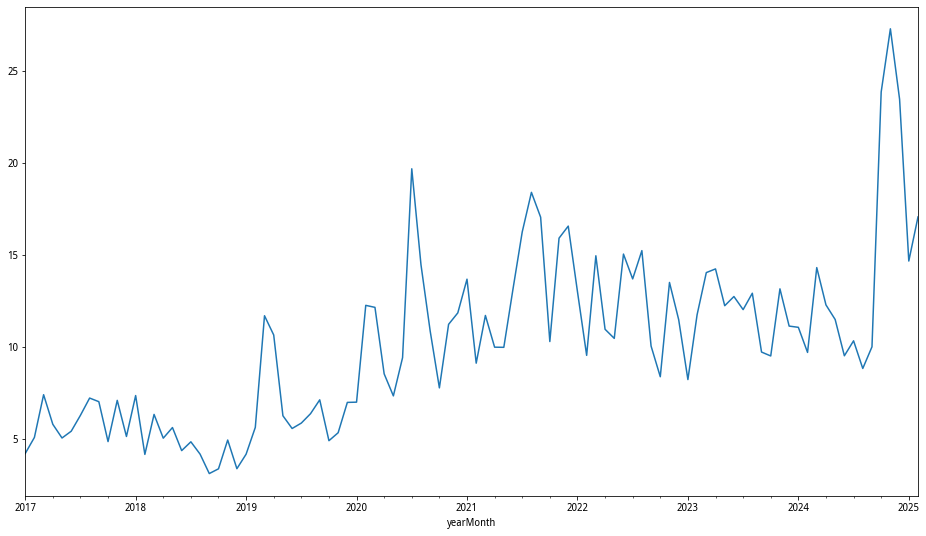

In [141]:
(stk_df.groupby(['yearMonth'])['turnoverValue'].sum() / 1e12).plot()

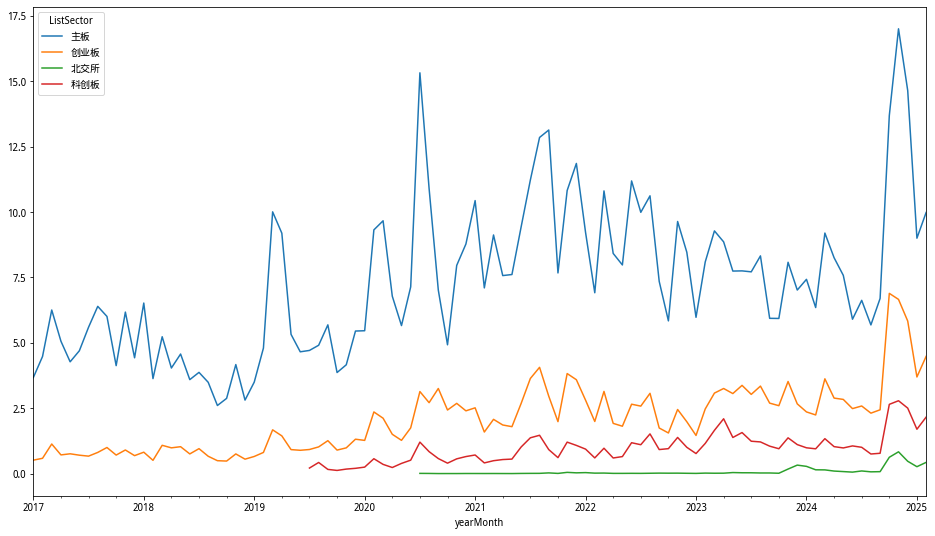

In [142]:
turnover_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

In [143]:
turnover_value_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

In [144]:
turnover_value_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

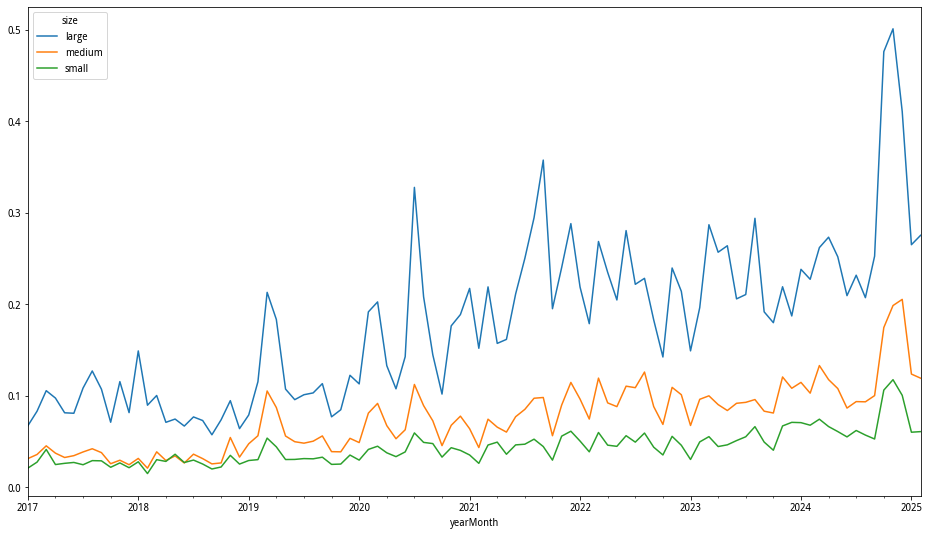

In [145]:
turnover_vol_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverVol'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverVol') / 1e12

turnover_vol_by_sector.plot()

## 平均换手率

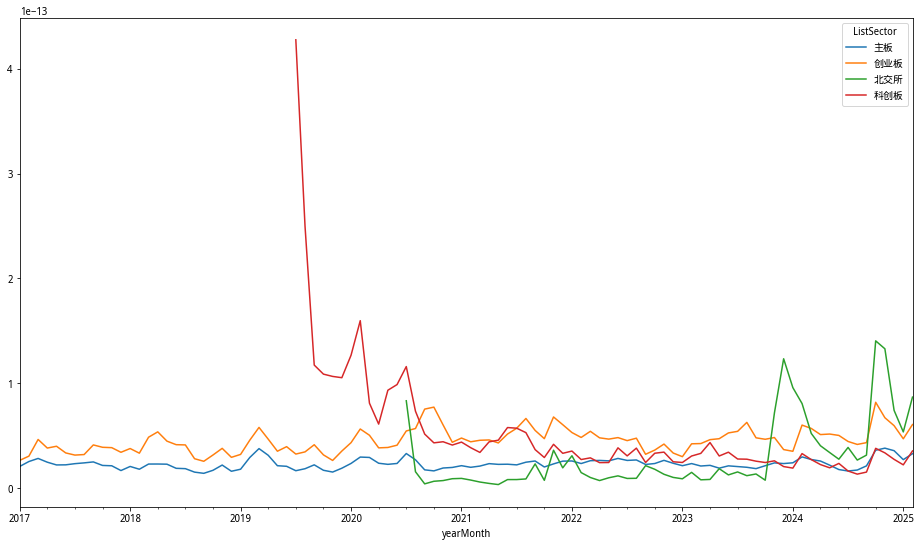

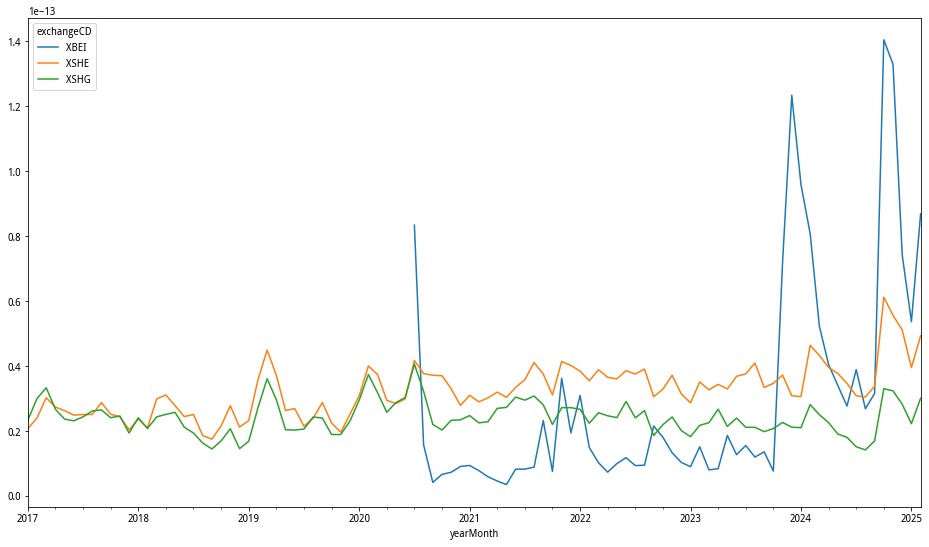

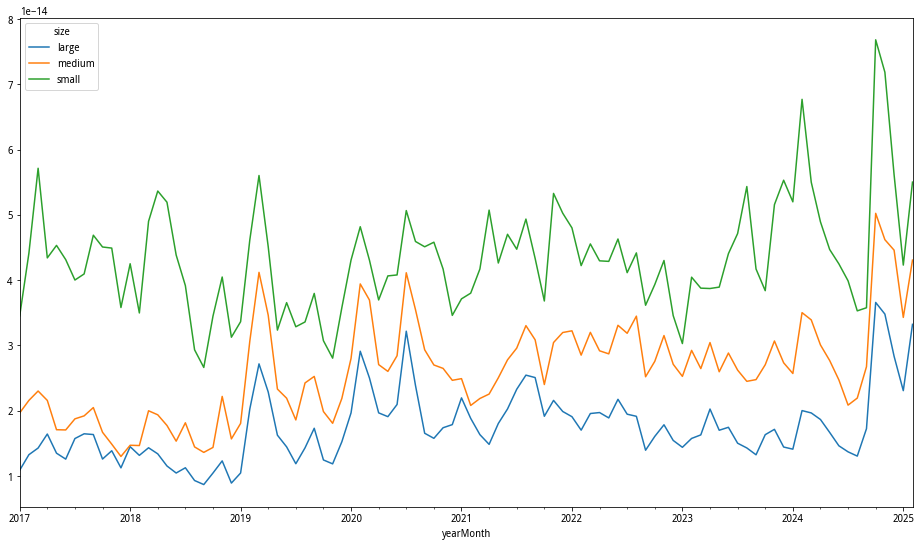

In [146]:
stk_df.groupby(['yearMonth'])['turnoverRate'].mean()

(stk_df.groupby(['yearMonth'])['turnoverRate'].mean() / 1e12).plot()

turnover_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_size = stk_df.groupby(['size','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='size',values='turnoverRate') / 1e12

turnover_by_size.plot()

## 平均收益率

In [147]:
stk_df

secID  tradeDate secShortName exchangeCD  preClosePrice  \
0        000001.XSHE 2017-01-03         平安银行       XSHE       1095.234   
1        000001.XSHE 2017-01-04         平安银行       XSHE       1102.456   
2        000001.XSHE 2017-01-05         平安银行       XSHE       1102.456   
3        000001.XSHE 2017-01-06         平安银行       XSHE       1103.659   
4        000001.XSHE 2017-01-09         平安银行       XSHE       1098.845   
5        000001.XSHE 2017-01-10         平安银行       XSHE       1101.252   
6        000001.XSHE 2017-01-11         平安银行       XSHE       1101.252   
7        000001.XSHE 2017-01-12         平安银行       XSHE       1100.048   
8        000001.XSHE 2017-01-13         平安银行       XSHE       1101.252   
9        000001.XSHE 2017-01-16         平安银行       XSHE       1102.456   
10       000001.XSHE 2017-01-17         平安银行       XSHE       1100.048   
11       000001.XSHE 2017-01-18         平安银行       XSHE       1101.252   
12       000001.XSHE 2017-01-19         平安银行       XSHE       1103.659   
13       000001.XSHE 2017-01-20         平安银行       XSHE       1104.863   
14       000001.XSHE 2017-01-23         平安银行       XSHE       1109.677   
15       000001.XSHE 2017-01-24         平安银行       XSHE       1109.677   
16       000001.XSHE 2017-01-25         平安银行       XSHE       1115.695   
17       000001.XSHE 2017-01-26         平安银行       XSHE       1114.491   
18       000002.XSHE 2017-01-03          万科A       XSHE       2495.594   
19       000002.XSHE 2017-01-04          万科A       XSHE       2517.453   
20       000002.XSHE 2017-01-05          万科A       XSHE       2532.026   
21       000002.XSHE 2017-01-06          万科A       XSHE       2541.741   
22       000002.XSHE 2017-01-09          万科A       XSHE       2506.524   
23       000002.XSHE 2017-01-10          万科A       XSHE       2508.953   
24       000002.XSHE 2017-01-11          万科A       XSHE       2499.237   
25       000002.XSHE 2017-01-13          万科A       XSHE       2477.378   
26       000002.XSHE 2017-01-16          万科A       XSHE       2648.609   
27       000002.XSHE 2017-01-17          万科A       XSHE       2550.242   
28       000002.XSHE 2017-01-18          万科A       XSHE       2525.954   
29       000002.XSHE 2017-01-19          万科A       XSHE       2540.527   
...              ...        ...          ...        ...            ...   
5798182  920116.XBEI 2025-02-21         星图测控       XBEI         64.490   
5798183  920116.XBEI 2025-02-24         星图测控       XBEI         63.980   
5798184  920118.XBEI 2025-02-05         太湖远大       XBEI         24.090   
5798185  920118.XBEI 2025-02-06         太湖远大       XBEI         24.090   
5798186  920118.XBEI 2025-02-07         太湖远大       XBEI         24.940   
5798187  920118.XBEI 2025-02-10         太湖远大       XBEI         25.640   
5798188  920118.XBEI 2025-02-11         太湖远大       XBEI         25.980   
5798189  920118.XBEI 2025-02-12         太湖远大       XBEI         26.780   
5798190  920118.XBEI 2025-02-13         太湖远大       XBEI         26.510   
5798191  920118.XBEI 2025-02-14         太湖远大       XBEI         25.500   
5798192  920118.XBEI 2025-02-17         太湖远大       XBEI         25.200   
5798193  920118.XBEI 2025-02-18         太湖远大       XBEI         25.600   
5798194  920118.XBEI 2025-02-19         太湖远大       XBEI         25.140   
5798195  920118.XBEI 2025-02-20         太湖远大       XBEI         25.680   
5798196  920118.XBEI 2025-02-21         太湖远大       XBEI         26.490   
5798197  920118.XBEI 2025-02-24         太湖远大       XBEI         26.420   
5798198  920128.XBEI 2025-02-05         胜业电气       XBEI         27.770   
5798199  920128.XBEI 2025-02-06         胜业电气       XBEI         27.620   
5798200  920128.XBEI 2025-02-07         胜业电气       XBEI         28.500   
5798201  920128.XBEI 2025-02-10         胜业电气       XBEI         29.190   
5798202  920128.XBEI 2025-02-11         胜业电气       XBEI         29.460   
5798203  920128.XBEI 2025-02-12         胜业电气       XBEI         29.990   
5798204  920128.XBE

In [148]:
stk_df['ret'] = stk_df['closePrice'] / stk_df['preClosePrice'] - 1

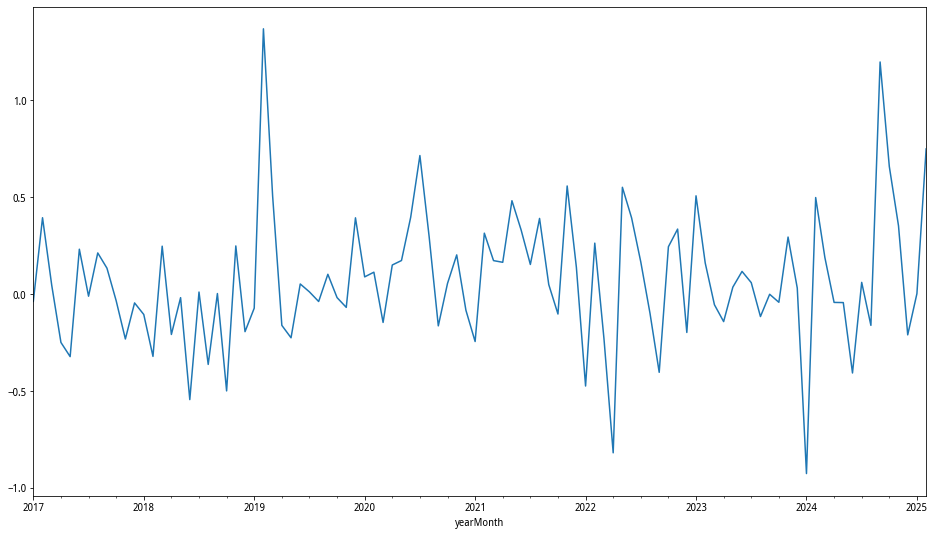

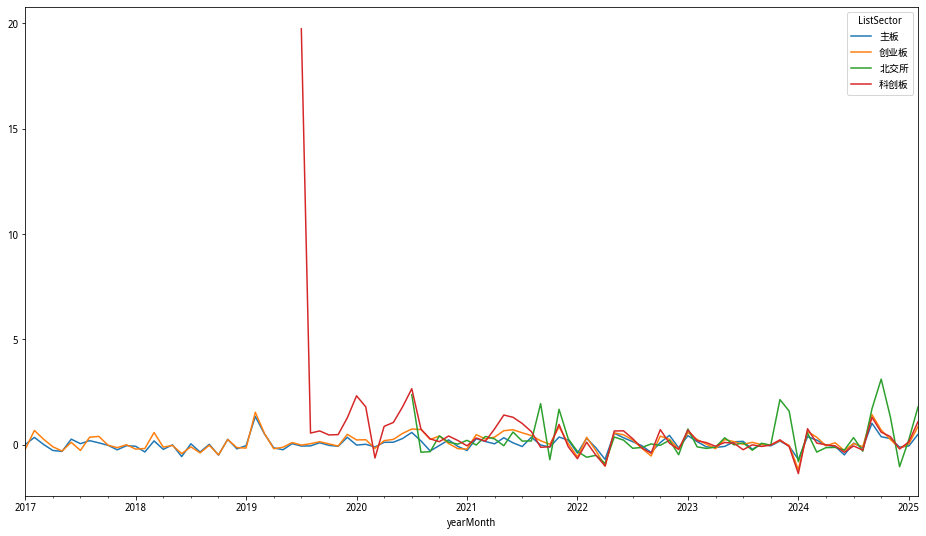

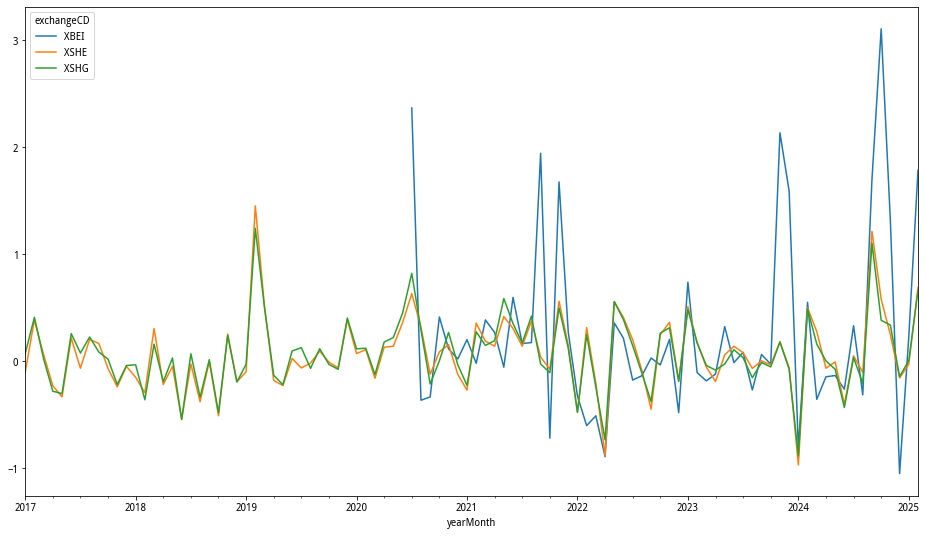

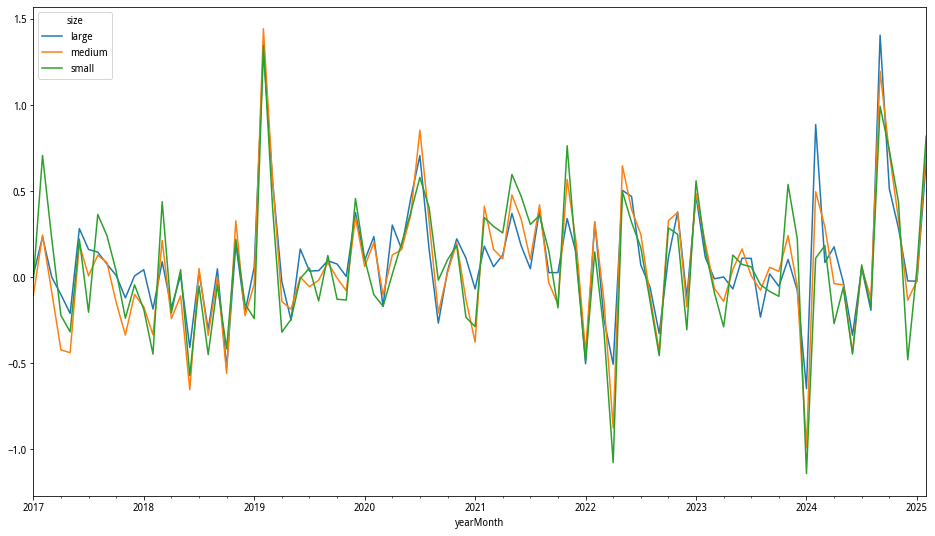

In [149]:
stk_df.groupby(['yearMonth'])['ret'].mean()

(stk_df.groupby(['yearMonth'])['ret'].mean() * 100).plot()

ret_by_sector = stk_df.groupby(['ListSector','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='ret') * 100

ret_by_sector.plot()

ret_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='ret') * 100

ret_by_exch.plot()

ret_by_size = stk_df.groupby(['size','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='size',values='ret') * 100

ret_by_size.plot()

## 波动率

In [150]:
stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean()

yearMonth
2017-01    0.023911
2017-02    0.018463
2017-03    0.020466
2017-04    0.026029
2017-05    0.024450
2017-06    0.021745
2017-07    0.024095
2017-08    0.019580
2017-09    0.019087
2017-10    0.021710
2017-11    0.023377
2017-12    0.020891
2018-01    0.021984
2018-02    0.033768
2018-03    0.026680
2018-04    0.025082
2018-05    0.024120
2018-06    0.030973
2018-07    0.026153
2018-08    0.024220
2018-09    0.020818
2018-10    0.035380
2018-11    0.027330
2018-12    0.022011
2019-01    0.023309
2019-02    0.025688
2019-03    0.034077
2019-04    0.030882
2019-05    0.032563
2019-06    0.025377
             ...   
2022-09    0.027313
2022-10    0.030391
2022-11    0.024583
2022-12    0.023502
2023-01    0.020822
2023-02    0.021309
2023-03    0.021799
2023-04    0.027496
2023-05    0.023968
2023-06    0.025244
2023-07    0.021845
2023-08    0.026106
2023-09    0.020773
2023-10    0.026529
2023-11    0.024327
2023-12    0.024785
2024-01    0.031276
2024-02    0.053522
2024-03   

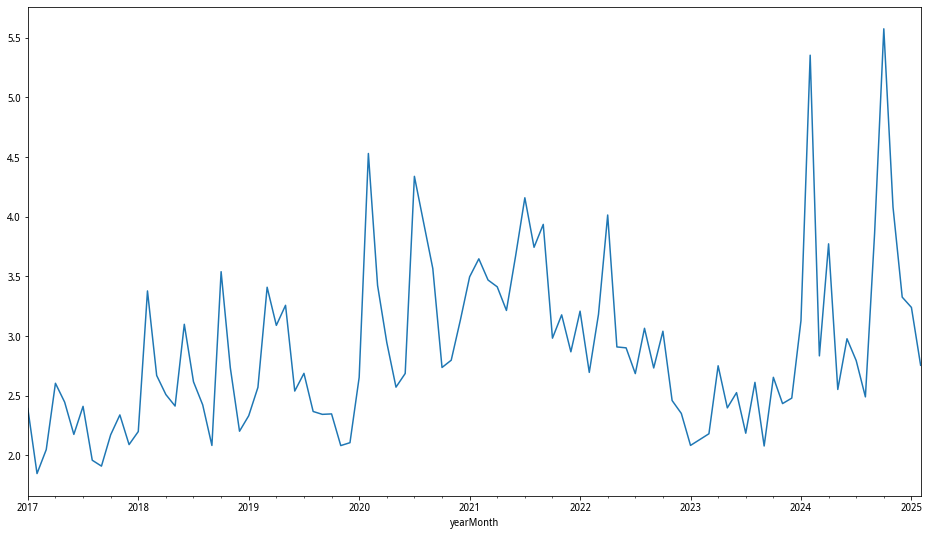

In [151]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

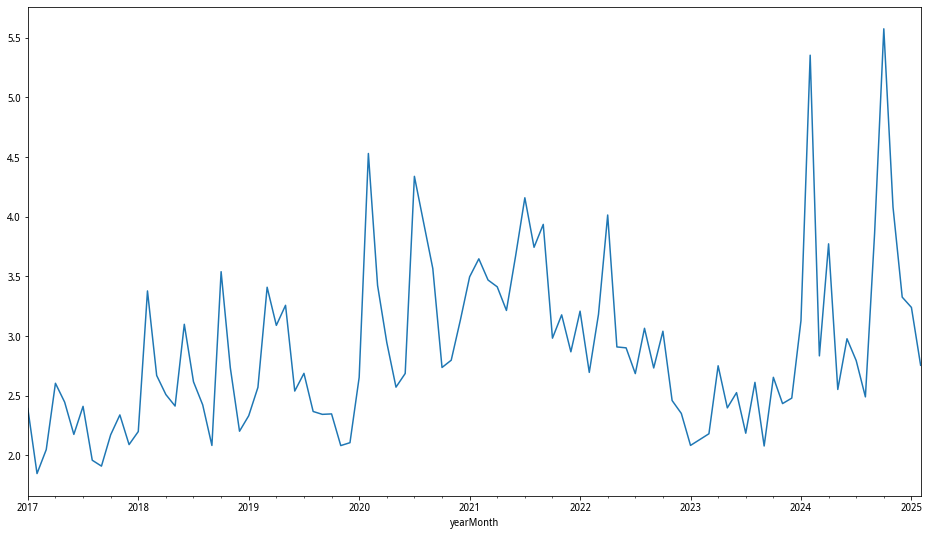

In [152]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

In [153]:
vol = stk_df.groupby(['yearMonth','secShortName'])['ret'].std()

In [154]:
temp = stk_df[['secShortName','yearMonth','ListSector','exchangeCD','size']].drop_duplicates(['secShortName','yearMonth'])

In [155]:
vol = pd.merge(vol,temp,on=['secShortName','yearMonth'])

In [156]:
del temp

In [157]:
vol.rename(columns={'ret':'vol'},inplace=True)

In [158]:
vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol')

ListSector        主板       创业板       北交所       科创板
yearMonth                                         
2017-01     0.022787  0.029795       NaN       NaN
2017-02     0.017669  0.022439       NaN       NaN
2017-03     0.019408  0.025676       NaN       NaN
2017-04     0.024871  0.031642       NaN       NaN
2017-05     0.023889  0.027182       NaN       NaN
2017-06     0.021097  0.024969       NaN       NaN
2017-07     0.023346  0.027826       NaN       NaN
2017-08     0.019161  0.021656       NaN       NaN
2017-09     0.017893  0.024864       NaN       NaN
2017-10     0.020398  0.027910       NaN       NaN
2017-11     0.021997  0.029709       NaN       NaN
2017-12     0.019914  0.025366       NaN       NaN
2018-01     0.020947  0.026678       NaN       NaN
2018-02     0.032852  0.037886       NaN       NaN
2018-03     0.025335  0.032730       NaN       NaN
2018-04     0.023578  0.031794       NaN       NaN
2018-05     0.022741  0.030176       NaN       NaN
2018-06     0.029688  0.036641       NaN       NaN
2018-07     0.025196  0.030407       NaN       NaN
2018-08     0.023479  0.027535       NaN       NaN
2018-09     0.019999  0.024488       NaN       NaN
2018-10     0.034829  0.037854       NaN       NaN
2018-11     0.026815  0.029649       NaN       NaN
2018-12     0.021270  0.025326       NaN       NaN
2019-01     0.022458  0.027097       NaN       NaN
2019-02     0.025279  0.027504       NaN       NaN
2019-03     0.033706  0.035731       NaN       NaN
2019-04     0.030269  0.033617       NaN       NaN
2019-05     0.031752  0.036210       NaN       NaN
2019-06     0.024234  0.030540       NaN       NaN
...              ...       ...       ...       ...
2022-09     0.025519  0.027678  0.043928  0.030867
2022-10     0.027007  0.032131  0.023709  0.044156
2022-11     0.022782  0.026309  0.019404  0.030917
2022-12     0.022249  0.024838  0.019624  0.027858
2023-01     0.019089  0.020811  0.022549  0.027737
2023-02     0.018489  0.024072  0.022357  0.028314
2023-03     0.019667  0.025052  0.014049  0.028125
2023-04     0.023618  0.032337  0.018029  0.039093
2023-05     0.020117  0.028878  0.029576  0.029512
2023-06     0.021998  0.029543  0.018971  0.033479
2023-07     0.018169  0.028682  0.021439  0.024962
2023-08     0.020185  0.038757  0.019573  0.030244
2023-09     0.017955  0.024971  0.021724  0.024212
2023-10     0.023105  0.028973  0.044907  0.028319
2023-11     0.018504  0.023721  0.078034  0.025913
2023-12     0.019720  0.024718  0.076432  0.022729
2024-01     0.028290  0.031457  0.062009  0.029357
2024-02     0.044326  0.068367  0.059778  0.060773
2024-03     0.024273  0.034493  0.035192  0.030350
2024-04     0.032766  0.047605  0.039275  0.039022
2024-05     0.021991  0.031461  0.031991  0.025903
2024-06     0.025438  0.038373  0.028155  0.032172
2024-07     0.024129  0.032678  0.040008  0.028950
2024-08     0.021188  0.032926  0.028214  0.023596
2024-09     0.030535  0.046348  0.058600  0.046799
2024-10     0.038775  0.071298  0.124033  0.062402
2024-11     0.035772  0.040614  0.080484  0.042239
2024-12     0.029308  0.035084  0.059818  0.032794
2025-01     0.028173  0.037062  0.046584  0.033601
2025-02     0.022648  0.029330  0.048345  0.033206

[98 rows x 4 columns]

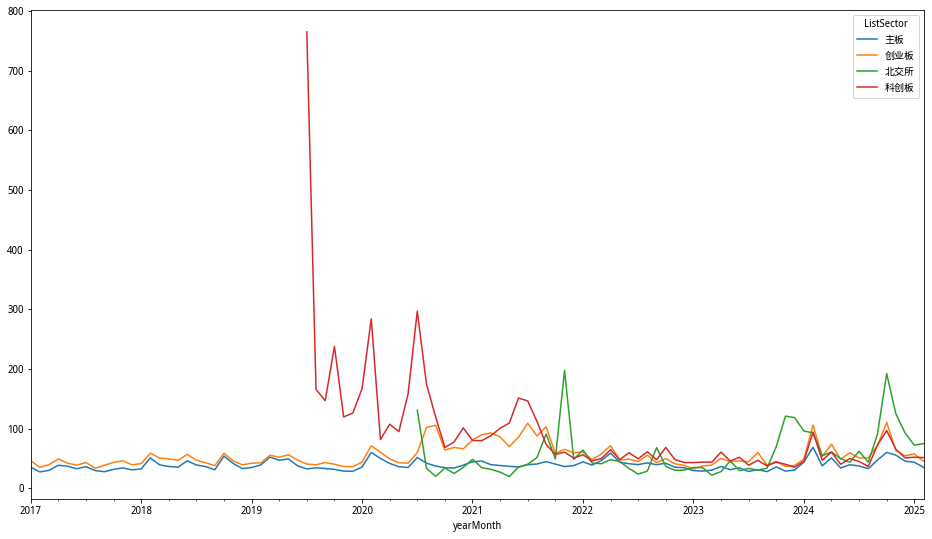

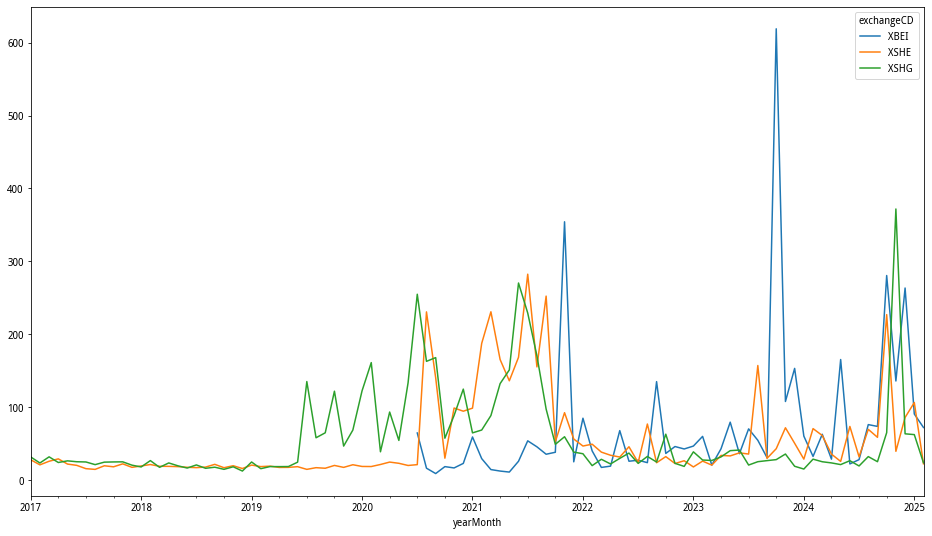

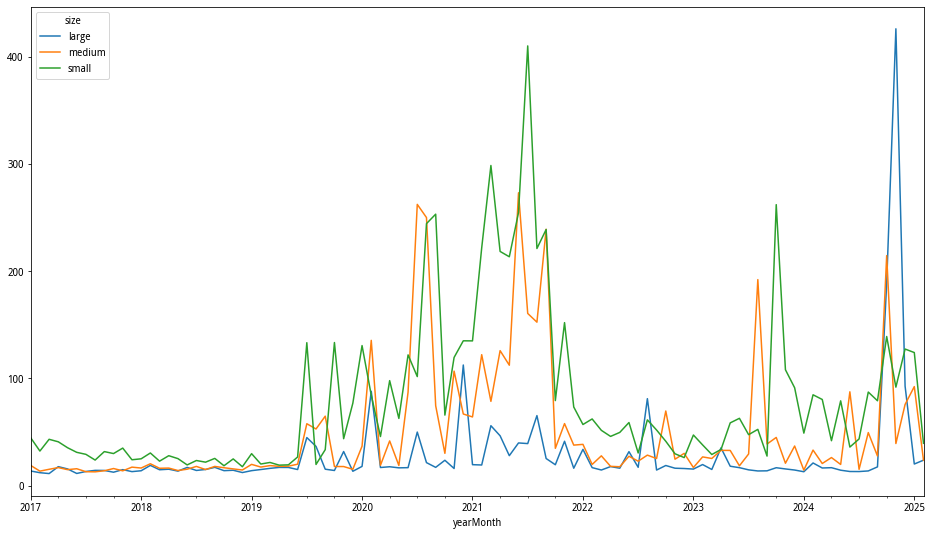

In [159]:
vol_by_sector = vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['exchangeCD','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['size','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='size',values='vol') * np.sqrt(240) * 100

vol_by_sector.plot()

## 所有在一起

In [160]:
group = stk_df.groupby(['yearMonth'])[['negMarketValue','turnoverValue','turnoverRate','ret']].agg({'negMarketValue':'sum','turnoverValue':'sum',
                                                                                                    'turnoverRate':'mean','ret':'mean'})

In [161]:
vol_mean = vol.groupby('yearMonth')['vol'].mean()

In [162]:
group = pd.merge(group,vol_mean,on='yearMonth')

In [163]:
# Standardize
from sklearn.preprocessing import StandardScaler

In [164]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2017-01      4.440495e+14   4.185753e+12      0.021666 -0.000381  0.023911
2017-02      4.539033e+14   5.062166e+12      0.026268  0.003934  0.018463
2017-03      5.918891e+14   7.385383e+12      0.031387  0.000447  0.020466
2017-04      4.563810e+14   5.776229e+12      0.027073 -0.002501  0.026029
2017-05      4.876579e+14   5.031570e+12      0.025211 -0.003232  0.024450
2017-06      5.514211e+14   5.400257e+12      0.024179  0.002309  0.021745
2017-07      5.441500e+14   6.263557e+12      0.024766 -0.000115  0.024095
2017-08      6.116255e+14   7.203477e+12      0.025469  0.002117  0.019580
2017-09      5.809548e+14   7.006076e+12      0.027821  0.001331  0.019087
2017-10      4.814794e+14   4.836178e+12      0.024698 -0.000348  0.021710
2017-11      6.335619e+14   7.077785e+12      0.024445 -0.002322  0.023377
2017-12      5.893917e+14   5.113827e+12      0.019935 -0.000462  0.020891
2018-01      6.497347e+14   7.338791e+12      0.023803 -0.001059  0.021984
2018-02      4.120878e+14   4.139472e+12      0.020861 -0.003220  0.033768
2018-03      6.119925e+14   6.314093e+12      0.027688  0.002466  0.026680
2018-04      4.884221e+14   5.021820e+12      0.028703 -0.002089  0.025082
2018-05      6.077343e+14   5.599869e+12      0.026968 -0.000189  0.024120
2018-06      5.213960e+14   4.345328e+12      0.023123 -0.005449  0.030973
2018-07      5.498757e+14   4.824044e+12      0.022800  0.000100  0.026153
2018-08      5.646906e+14   4.153800e+12      0.017654 -0.003634  0.024220
2018-09      4.594682e+14   3.097452e+12      0.016272  0.000022  0.020818
2018-10      4.127439e+14   3.355466e+12      0.019711 -0.005000  0.035380
2018-11      5.264996e+14   4.920635e+12      0.024957  0.002478  0.027330
2018-12      4.745427e+14   3.362510e+12      0.018577 -0.001944  0.022011
2019-01      5.228928e+14   4.151189e+12      0.020678 -0.000732  0.023309
2019-02      3.939133e+14   5.606569e+12      0.032329  0.013679  0.025688
2019-03      6.135224e+14   1.167968e+13      0.041457  0.005053  0.034077
2019-04      6.519272e+14   1.063233e+13      0.034208 -0.001619  0.030882
2019-05      5.613817e+14   6.240840e+12      0.023956 -0.002261  0.032563
2019-06      5.423546e+14   5.547918e+12      0.024278  0.000516  0.025377
...                   ...            ...           ...       ...       ...
2022-09      9.209753e+14   1.002959e+13      0.025094 -0.004041  0.027313
2022-10      6.688762e+14   8.362663e+12      0.027643  0.002437  0.030391
2022-11      9.507517e+14   1.348944e+13      0.030790  0.003347  0.024583
2022-12      9.756075e+14   1.146326e+13      0.025716 -0.001985  0.023502
2023-01      7.341783e+14   8.208347e+12      0.023323  0.005063  0.020822
2023-02      9.519358e+14   1.173545e+13      0.028482  0.001597  0.021309
2023-03      1.092193e+15   1.402586e+13      0.027158 -0.000555  0.021799
2023-04      9.198783e+14   1.422547e+13      0.029803 -0.001425  0.027496
2023-05      9.521767e+14   1.222370e+13      0.027280  0.000353  0.023968
2023-06      9.520110e+14   1.272447e+13      0.030096  0.001164  0.025244
2023-07      1.014776e+15   1.201222e+13      0.029420  0.000585  0.021845
2023-08      1.102509e+15   1.290362e+13      0.030971 -0.001164  0.026106
2023-09      9.459741e+14   9.704778e+12      0.026546 -0.000015  0.020773
2023-10      7.805534e+14   9.492190e+12      0.027242 -0.000430  0.026529
2023-11      1.024337e+15   1.314156e+13      0.033099  0.002936  0.024327
2023-12      9.472301e+14   1.111667e+13      0.032304  0.000306  0.024785
2024-01      9.569971e+14   1.104928e+13      0.030545 -0.009264  0.031276
2024-02      6.462109e+14   9.684437e+12      0.040848  0.004974  0.053522
2024-03      9.688158e+14   1.429697e+13      0.036161  0.001881  0.028326
2024-04      9.219240e+14   1.226866e+13      0.032520 -0.000436  0.037715
2024-05      9.505895e+14   1.147482

In [165]:
StandardScaler()

StandardScaler()

In [166]:
StandardScaler().fit().transform()

TypeError: fit() missing 1 required positional argument: 'X'

In [167]:
group[['negMarketValue','turnoverValue','turnoverRate']] = StandardScaler().fit(group[['negMarketValue','turnoverValue','turnoverRate']]).transform(group[['negMarketValue','turnoverValue','turnoverRate']])

In [168]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2017-01         -1.558195      -1.272283     -1.139634 -0.000381  0.023911
2017-02         -1.509769      -1.084708     -0.422640  0.003934  0.018463
2017-03         -0.831646      -0.587479      0.374741  0.000447  0.020466
2017-04         -1.497592      -0.931880     -0.297211 -0.002501  0.026029
2017-05         -1.343884      -1.091256     -0.587392 -0.003232  0.024450
2017-06         -1.030524      -1.012348     -0.748102  0.002309  0.021745
2017-07         -1.066257      -0.827579     -0.656609 -0.000115  0.024095
2017-08         -0.734653      -0.626412     -0.547205  0.002117  0.019580
2017-09         -0.885382      -0.668661     -0.180664  0.001331  0.019087
2017-10         -1.374248      -1.133075     -0.667198 -0.000348  0.021710
2017-11         -0.626848      -0.653313     -0.706628 -0.002322  0.023377
2017-12         -0.843919      -1.073651     -1.409289 -0.000462  0.020891
2018-01         -0.547368      -0.597451     -0.806657 -0.001059  0.021984
2018-02         -1.715268      -1.282189     -1.265039 -0.003220  0.033768
2018-03         -0.732849      -0.816763     -0.201412  0.002466  0.026680
2018-04         -1.340128      -1.093343     -0.043331 -0.002089  0.025082
2018-05         -0.753776      -0.969626     -0.313650 -0.000189  0.024120
2018-06         -1.178080      -1.238130     -0.912568 -0.005449  0.030973
2018-07         -1.038118      -1.135672     -0.962874  0.000100  0.026153
2018-08         -0.965311      -1.279122     -1.764700 -0.003634  0.024220
2018-09         -1.482420      -1.505208     -1.980018  0.000022  0.020818
2018-10         -1.712044      -1.449986     -1.444112 -0.005000  0.035380
2018-11         -1.152999      -1.114999     -0.626892  0.002478  0.027330
2018-12         -1.408338      -1.448479     -1.620838 -0.001944  0.022011
2019-01         -1.170724      -1.279681     -1.293580 -0.000732  0.023309
2019-02         -1.804586      -0.968192      0.521563  0.013679  0.025688
2019-03         -0.725331       0.331612      1.943692  0.005053  0.034077
2019-04         -0.536593       0.107454      0.814276 -0.001619  0.030882
2019-05         -0.981573      -0.832441     -0.782851 -0.002261  0.032563
2019-06         -1.075081      -0.980744     -0.732666  0.000516  0.025377
...                   ...            ...           ...       ...       ...
2022-09          0.785627      -0.021550     -0.605581 -0.004041  0.027313
2022-10         -0.453298      -0.378315     -0.208505  0.002437  0.030391
2022-11          0.931961       0.718950      0.281749  0.003347  0.024583
2022-12          1.054114       0.285294     -0.508591 -0.001985  0.023502
2023-01         -0.132375      -0.411343     -0.881525  0.005063  0.020822
2023-02          0.937781       0.343549     -0.077706  0.001597  0.021309
2023-03          1.627066       0.833756     -0.284050 -0.000555  0.021799
2023-04          0.780236       0.876479      0.128120 -0.001425  0.027496
2023-05          0.938965       0.448048     -0.265026  0.000353  0.023968
2023-06          0.938150       0.555226      0.173701  0.001164  0.025244
2023-07          1.246607       0.402785      0.068313  0.000585  0.021845
2023-08          1.677763       0.593569      0.310067 -0.001164  0.026106
2023-09          0.908482      -0.091068     -0.379314 -0.000015  0.020773
2023-10          0.095533      -0.136567     -0.270960 -0.000430  0.026529
2023-11          1.293590       0.644494      0.641565  0.002936  0.024327
2023-12          0.914655       0.211114      0.517721  0.000306  0.024785
2024-01          0.962654       0.196690      0.243652 -0.009264  0.031276
2024-02         -0.564685      -0.095421      1.848760  0.004974  0.053522
2024-03          1.020737       0.891782      1.118501  0.001881  0.028326
2024-04          0.790290       0.457670      0.551342 -0.000436  0.037715
2024-05          0.931164       0.28

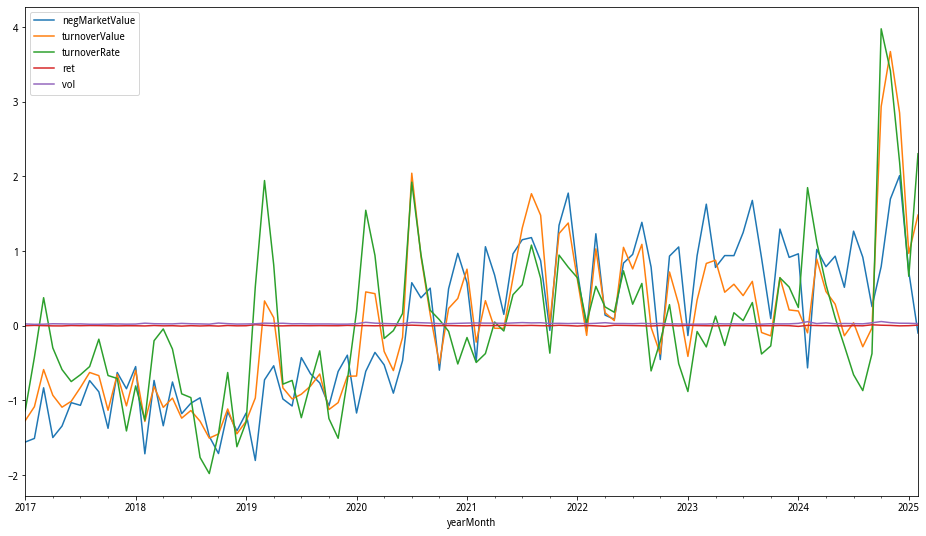

In [169]:
group.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f29c6cd0>,
      dtype=object)

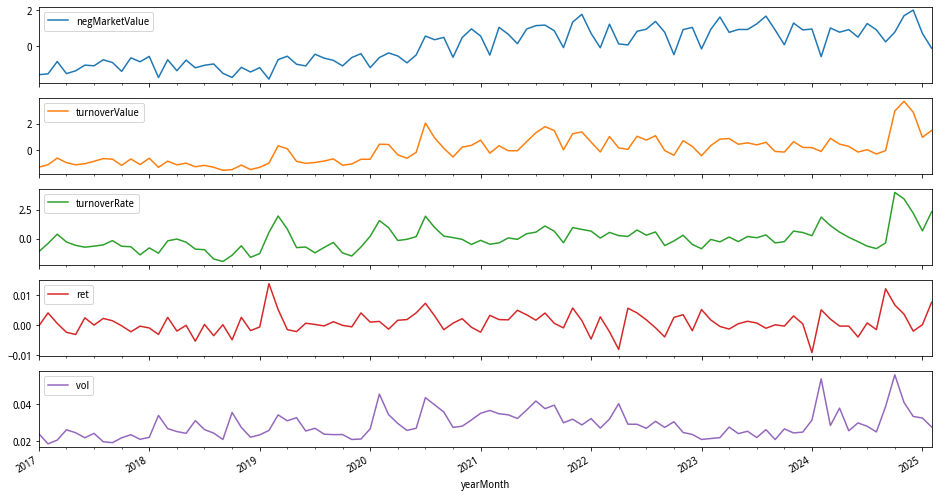

In [170]:
group.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99e7ffe1d0>,
      dtype=object)

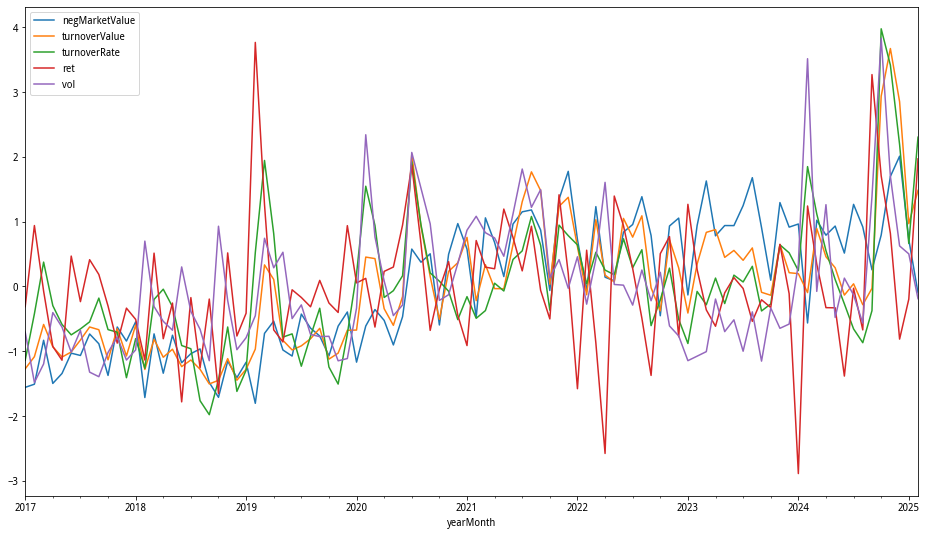

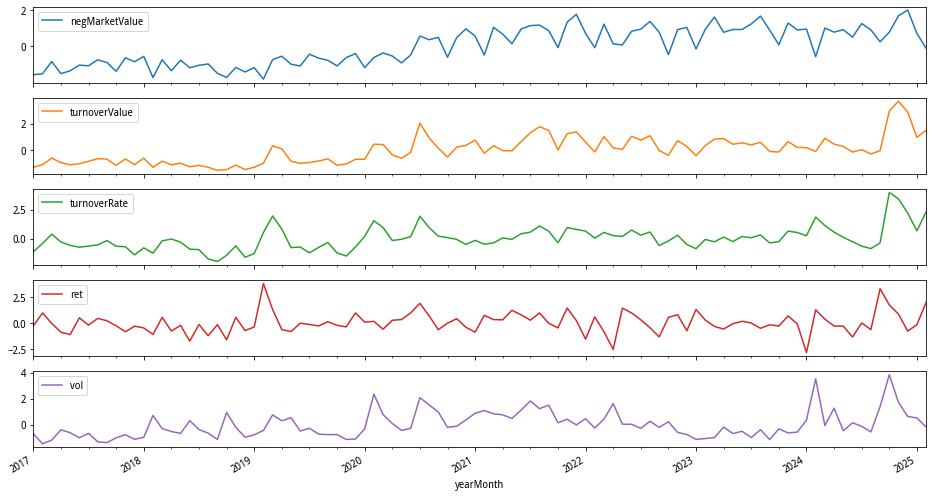

In [171]:
group[group.columns] = StandardScaler().fit(group).transform(group)

group.plot()

group.plot(subplots=True)

In [172]:
group[['turnoverRate','ret']].corr()

turnoverRate       ret
turnoverRate      1.000000  0.374617
ret               0.374617  1.000000

In [173]:
group[['turnoverValue','ret']].corr()

turnoverValue       ret
turnoverValue       1.000000  0.233808
ret                 0.233808  1.000000

In [174]:
group.corr()

negMarketValue  turnoverValue  turnoverRate       ret  \
negMarketValue        1.000000       0.821216      0.490279  0.030407   
turnoverValue         0.821216       1.000000      0.838910  0.233808   
turnoverRate          0.490279       0.838910      1.000000  0.374617   
ret                   0.030407       0.233808      0.374617  1.000000   
vol                   0.277905       0.556697      0.635427  0.151772   

                     vol  
negMarketValue  0.277905  
turnoverValue   0.556697  
turnoverRate    0.635427  
ret             0.151772  
vol             1.000000

In [175]:
import seaborn as sns

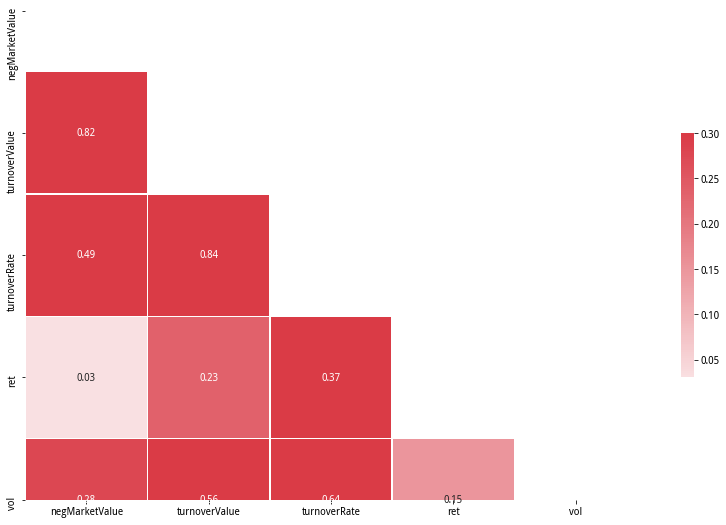

In [176]:
corr = group.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, annot_kws={"size": 10},cbar_kws={"shrink": .5})